# League of Legends Dataset - Data Wrangling Pt. 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
df = pd.read_csv('gold_df_merged.csv', index_col=0)
df.head()

,match_id,league,season,year,team_name,red_or_blue_side,result,game_length,type,player_name,champion,min_0,min_1,min_2,min_3,min_4,min_5,min_6,min_7,min_8,min_9,min_10,min_11,min_12,min_13,min_14,min_15,min_16,min_17,min_18,min_19,min_20,min_21,min_22,min_23,min_24,min_25,min_26,min_27,min_28,min_29,min_30,min_31,min_32,min_33,min_34,min_35,min_36,min_37,min_38,min_39,min_40,min_41,min_42,min_43,min_44,min_45,min_46,min_47,min_48,min_49,min_50,min_51,min_52,min_53,min_54,min_55,min_56,min_57,min_58,min_59,min_60,min_61,min_62,min_63,min_64,min_65,min_66,min_67,min_68,min_69,min_70,min_71,min_72,min_73,min_74,min_75,min_76,min_77,min_78,min_79,min_80
0,001a1f289e3bab22,LCK,Summer_Season,2015,ANC,blue,0,38,total_gold,NaN,NaN,2415,2430,2751,3929,5219,6418,8156,9520,10681,12036,13678,15590,16782,18417,20052,21608,23396,24248,25691,27452.0,30446.0,31672.0,33665.0,36399.0,37571.0,38659.0,39757.0,41498.0,42861.0,44378.0,45719.0,47095.0,48551.0,49524.0,51200.0,52518.0,53247.0,53893.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,001a1f289e3bab22,LCK,Summer_Season,2015,CJE,red,1,38,total_gold,NaN,NaN,2415,2415,2705,4062,5279,7322,8661,10372,11444,13260,14676,15723,18119,19663,21237,22809,24997,28072,30162,31469.0,32490.0,34362.0,36662.0,37981.0,39398.0,40331.0,41652.0,44239.0,45948.0,47134.0,49334.0,51052.0,52586.0,53374.0,55245.0,56618.0,62198.0,62846.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,001f50c8547e2e73,Season_World_Championship,International,2014,EDG,blue,1,37,total_gold,NaN,NaN,2415,2415,2705,3817,4956,6132,7499,8605,9942,11434,13028,15942,17653,19941,21320,23236,24835,26384,29350,32365.0,33752.0,35258.0,39070.0,40973.0,42591.0,45637.0,46672.0,48001.0,49458.0,51181.0,52245.0,54233.0,58476.0,61061.0,62324.0,65435.0,69584.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,001f50c8547e2e73,Season_World_Championship,International,2014,AHQ,red,0,37,total_gold,NaN,NaN,2415,2415,2705,3728,5048,6306,7308,8536,9689,11072,12952,13978,15289,16639,18575,19558,22343,23318,24585,25342.0,26616.0,27778.0,29198.0,30997.0,32647.0,34549.0,35535.0,36591.0,38024.0,39272.0,40585.0,41883.0,42547.0,43836.0,45798.0,46951.0,47804.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,002f613ae09ad421,LMS,Spring_Season,2016,TPA,blue,1,30,total_gold,NaN,NaN,2500,2500,2785,4216,6193,7618,9674,11203,13004,14497,15653,17089,19084,20938,22437,24228,27072,28475,31466,34244.0,37178.0,39046.0,41074.0,42978.0,44964.0,48148.0,49707.0,51624.0,54594.0,56268.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_merged = pd.read_csv('merged_df.csv', index_col=0)
df_merged.head()

,match_id,league,season,year,team_name,red_or_blue_side,result,game_length,top_player,top_champ,jungle_player,jungle_champ,mid_player,mid_champ,adc_player,adc_champ,support_player,support_champ,ban_1,ban_2,ban_3,ban_4,ban_5
0,001a1f289e3bab22,LCK,Summer_Season,2015,ANC,blue,0,38,ikssu,Hecarim,lira,Gragas,Mickey,Vladimir,Sangyoon,Sivir,SnowFlower,Morgana,'Azir','Shyvana','Jayce',NaN,NaN
1,001a1f289e3bab22,LCK,Summer_Season,2015,CJE,red,1,38,Shy,Rumble,Ambition,Sejuani,Coco,Cassiopeia,Space,Jinx,Thresh,MadLife,'Zed','Gnar','Kalista',NaN,NaN
2,001f50c8547e2e73,Season_World_Championship,International,2014,EDG,blue,1,37,Koro1,Maokai,Clearlove,Rengar,U,Zed,NaMei,Twitch,Fzzf,Thresh,'Fizz','LeeSin','TwistedFate',NaN,NaN
3,001f50c8547e2e73,Season_World_Championship,International,2014,AHQ,red,0,37,Prydz,Nidalee,NAZ,Khazix,westdoor,Talon,GarnetDevil,Lucian,Blitzcrank,GreenTea,'Ryze','Zilean','Alistar',NaN,NaN
4,002f613ae09ad421,LMS,Spring_Season,2016,TPA,blue,1,30,Morning,Trundle,REFRA1N,RekSai,FoFo,Lissandra,BeBe,Lucian,Jay,Alistar,'Corki','Gangplank','TahmKench',NaN,NaN


In [4]:
gold_df = pd.read_csv('gold_df_merged.csv', index_col=0)
gold_df.head()

,match_id,league,season,year,team_name,red_or_blue_side,result,game_length,type,player_name,champion,min_0,min_1,min_2,min_3,min_4,min_5,min_6,min_7,min_8,min_9,min_10,min_11,min_12,min_13,min_14,min_15,min_16,min_17,min_18,min_19,min_20,min_21,min_22,min_23,min_24,min_25,min_26,min_27,min_28,min_29,min_30,min_31,min_32,min_33,min_34,min_35,min_36,min_37,min_38,min_39,min_40,min_41,min_42,min_43,min_44,min_45,min_46,min_47,min_48,min_49,min_50,min_51,min_52,min_53,min_54,min_55,min_56,min_57,min_58,min_59,min_60,min_61,min_62,min_63,min_64,min_65,min_66,min_67,min_68,min_69,min_70,min_71,min_72,min_73,min_74,min_75,min_76,min_77,min_78,min_79,min_80
0,001a1f289e3bab22,LCK,Summer_Season,2015,ANC,blue,0,38,total_gold,NaN,NaN,2415,2430,2751,3929,5219,6418,8156,9520,10681,12036,13678,15590,16782,18417,20052,21608,23396,24248,25691,27452.0,30446.0,31672.0,33665.0,36399.0,37571.0,38659.0,39757.0,41498.0,42861.0,44378.0,45719.0,47095.0,48551.0,49524.0,51200.0,52518.0,53247.0,53893.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,001a1f289e3bab22,LCK,Summer_Season,2015,CJE,red,1,38,total_gold,NaN,NaN,2415,2415,2705,4062,5279,7322,8661,10372,11444,13260,14676,15723,18119,19663,21237,22809,24997,28072,30162,31469.0,32490.0,34362.0,36662.0,37981.0,39398.0,40331.0,41652.0,44239.0,45948.0,47134.0,49334.0,51052.0,52586.0,53374.0,55245.0,56618.0,62198.0,62846.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,001f50c8547e2e73,Season_World_Championship,International,2014,EDG,blue,1,37,total_gold,NaN,NaN,2415,2415,2705,3817,4956,6132,7499,8605,9942,11434,13028,15942,17653,19941,21320,23236,24835,26384,29350,32365.0,33752.0,35258.0,39070.0,40973.0,42591.0,45637.0,46672.0,48001.0,49458.0,51181.0,52245.0,54233.0,58476.0,61061.0,62324.0,65435.0,69584.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,001f50c8547e2e73,Season_World_Championship,International,2014,AHQ,red,0,37,total_gold,NaN,NaN,2415,2415,2705,3728,5048,6306,7308,8536,9689,11072,12952,13978,15289,16639,18575,19558,22343,23318,24585,25342.0,26616.0,27778.0,29198.0,30997.0,32647.0,34549.0,35535.0,36591.0,38024.0,39272.0,40585.0,41883.0,42547.0,43836.0,45798.0,46951.0,47804.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,002f613ae09ad421,LMS,Spring_Season,2016,TPA,blue,1,30,total_gold,NaN,NaN,2500,2500,2785,4216,6193,7618,9674,11203,13004,14497,15653,17089,19084,20938,22437,24228,27072,28475,31466,34244.0,37178.0,39046.0,41074.0,42978.0,44964.0,48148.0,49707.0,51624.0,54594.0,56268.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## TOTAL

The sections below calculate the gold difference for teams, and the 10 players in each game.

In [38]:
df = pd.read_csv('total_gold.csv', index_col=0)
df.head()

,match_id,league,season,year,team_name,red_or_blue_side,result,game_length,type,player_name,champion,min_0,min_1,min_2,min_3,min_4,min_5,min_6,min_7,min_8,min_9,min_10,min_11,min_12,min_13,min_14,min_15,min_16,min_17,min_18,min_19,min_20,min_21,min_22,min_23,min_24,min_25,min_26,min_27,min_28,min_29,min_30,min_31,min_32,min_33,min_34,min_35,min_36,min_37,min_38,min_39,min_40,min_41,min_42,min_43,min_44,min_45,min_46,min_47,min_48,min_49,min_50,min_51,min_52,min_53,min_54,min_55,min_56,min_57,min_58,min_59,min_60,min_61,min_62,min_63,min_64,min_65,min_66,min_67,min_68,min_69,min_70,min_71,min_72,min_73,min_74,min_75,min_76,min_77,min_78,min_79,min_80
0,001a1f289e3bab22,LCK,Summer_Season,2015,ANC,blue,0,38,total_gold,NaN,NaN,2415,2430,2751,3929,5219,6418,8156,9520,10681,12036,13678,15590,16782,18417,20052,21608,23396,24248,25691,27452.0,30446.0,31672.0,33665.0,36399.0,37571.0,38659.0,39757.0,41498.0,42861.0,44378.0,45719.0,47095.0,48551.0,49524.0,51200.0,52518.0,53247.0,53893.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,001a1f289e3bab22,LCK,Summer_Season,2015,CJE,red,1,38,total_gold,NaN,NaN,2415,2415,2705,4062,5279,7322,8661,10372,11444,13260,14676,15723,18119,19663,21237,22809,24997,28072,30162,31469.0,32490.0,34362.0,36662.0,37981.0,39398.0,40331.0,41652.0,44239.0,45948.0,47134.0,49334.0,51052.0,52586.0,53374.0,55245.0,56618.0,62198.0,62846.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,001f50c8547e2e73,Season_World_Championship,International,2014,EDG,blue,1,37,total_gold,NaN,NaN,2415,2415,2705,3817,4956,6132,7499,8605,9942,11434,13028,15942,17653,19941,21320,23236,24835,26384,29350,32365.0,33752.0,35258.0,39070.0,40973.0,42591.0,45637.0,46672.0,48001.0,49458.0,51181.0,52245.0,54233.0,58476.0,61061.0,62324.0,65435.0,69584.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,001f50c8547e2e73,Season_World_Championship,International,2014,AHQ,red,0,37,total_gold,NaN,NaN,2415,2415,2705,3728,5048,6306,7308,8536,9689,11072,12952,13978,15289,16639,18575,19558,22343,23318,24585,25342.0,26616.0,27778.0,29198.0,30997.0,32647.0,34549.0,35535.0,36591.0,38024.0,39272.0,40585.0,41883.0,42547.0,43836.0,45798.0,46951.0,47804.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,002f613ae09ad421,LMS,Spring_Season,2016,TPA,blue,1,30,total_gold,NaN,NaN,2500,2500,2785,4216,6193,7618,9674,11203,13004,14497,15653,17089,19084,20938,22437,24228,27072,28475,31466,34244.0,37178.0,39046.0,41074.0,42978.0,44964.0,48148.0,49707.0,51624.0,54594.0,56268.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df.drop(['league', 'season', 'year', 'team_name', 'result', 'game_length',
             'type', 'player_name', 'champion'], inplace=True, axis=1)
df.head()

,match_id,red_or_blue_side,min_0,min_1,min_2,min_3,min_4,min_5,min_6,min_7,min_8,min_9,min_10,min_11,min_12,min_13,min_14,min_15,min_16,min_17,min_18,min_19,min_20,min_21,min_22,min_23,min_24,min_25,min_26,min_27,min_28,min_29,min_30,min_31,min_32,min_33,min_34,min_35,min_36,min_37,min_38,min_39,min_40,min_41,min_42,min_43,min_44,min_45,min_46,min_47,min_48,min_49,min_50,min_51,min_52,min_53,min_54,min_55,min_56,min_57,min_58,min_59,min_60,min_61,min_62,min_63,min_64,min_65,min_66,min_67,min_68,min_69,min_70,min_71,min_72,min_73,min_74,min_75,min_76,min_77,min_78,min_79,min_80
0,001a1f289e3bab22,blue,2415,2430,2751,3929,5219,6418,8156,9520,10681,12036,13678,15590,16782,18417,20052,21608,23396,24248,25691,27452.0,30446.0,31672.0,33665.0,36399.0,37571.0,38659.0,39757.0,41498.0,42861.0,44378.0,45719.0,47095.0,48551.0,49524.0,51200.0,52518.0,53247.0,53893.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,001a1f289e3bab22,red,2415,2415,2705,4062,5279,7322,8661,10372,11444,13260,14676,15723,18119,19663,21237,22809,24997,28072,30162,31469.0,32490.0,34362.0,36662.0,37981.0,39398.0,40331.0,41652.0,44239.0,45948.0,47134.0,49334.0,51052.0,52586.0,53374.0,55245.0,56618.0,62198.0,62846.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,001f50c8547e2e73,blue,2415,2415,2705,3817,4956,6132,7499,8605,9942,11434,13028,15942,17653,19941,21320,23236,24835,26384,29350,32365.0,33752.0,35258.0,39070.0,40973.0,42591.0,45637.0,46672.0,48001.0,49458.0,51181.0,52245.0,54233.0,58476.0,61061.0,62324.0,65435.0,69584.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,001f50c8547e2e73,red,2415,2415,2705,3728,5048,6306,7308,8536,9689,11072,12952,13978,15289,16639,18575,19558,22343,23318,24585,25342.0,26616.0,27778.0,29198.0,30997.0,32647.0,34549.0,35535.0,36591.0,38024.0,39272.0,40585.0,41883.0,42547.0,43836.0,45798.0,46951.0,47804.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,002f613ae09ad421,blue,2500,2500,2785,4216,6193,7618,9674,11203,13004,14497,15653,17089,19084,20938,22437,24228,27072,28475,31466,34244.0,37178.0,39046.0,41074.0,42978.0,44964.0,48148.0,49707.0,51624.0,54594.0,56268.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
g = df.groupby('match_id', sort=False)[df.columns[2:]]
df = g.diff().fillna(0) + g.diff(-1).fillna(0)

In [41]:
df.tail()

,min_0,min_1,min_2,min_3,min_4,min_5,min_6,min_7,min_8,min_9,min_10,min_11,min_12,min_13,min_14,min_15,min_16,min_17,min_18,min_19,min_20,min_21,min_22,min_23,min_24,min_25,min_26,min_27,min_28,min_29,min_30,min_31,min_32,min_33,min_34,min_35,min_36,min_37,min_38,min_39,min_40,min_41,min_42,min_43,min_44,min_45,min_46,min_47,min_48,min_49,min_50,min_51,min_52,min_53,min_54,min_55,min_56,min_57,min_58,min_59,min_60,min_61,min_62,min_63,min_64,min_65,min_66,min_67,min_68,min_69,min_70,min_71,min_72,min_73,min_74,min_75,min_76,min_77,min_78,min_79,min_80
7599,0.0,-10.0,-96.0,-169.0,67.0,-124.0,-433.0,173.0,150.0,1082.0,888.0,722.0,626.0,-115.0,-219.0,-1000.0,-248.0,-1205.0,-1107.0,-1202.0,-1393.0,-1024.0,-738.0,-739.0,-349.0,-400.0,-668.0,-1897.0,-1745.0,-2835.0,-3092.0,-2700.0,-1854.0,-1551.0,-1490.0,-1440.0,-1466.0,-339.0,-884.0,-2063.0,-1956.0,-3024.0,-5951.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7600,0.0,0.0,6.0,525.0,869.0,327.0,398.0,-21.0,837.0,1246.0,-88.0,778.0,488.0,373.0,261.0,-187.0,134.0,808.0,2150.0,1302.0,1843.0,1347.0,-1200.0,-1631.0,-2341.0,-2320.0,-2661.0,-6000.0,-6048.0,-9066.0,-9660.0,-10083.0,-10819.0,-11054.0,-11149.0,-12982.0,-13398.0,-11587.0,-10791.0,-10938.0,-14584.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7601,0.0,0.0,-6.0,-525.0,-869.0,-327.0,-398.0,21.0,-837.0,-1246.0,88.0,-778.0,-488.0,-373.0,-261.0,187.0,-134.0,-808.0,-2150.0,-1302.0,-1843.0,-1347.0,1200.0,1631.0,2341.0,2320.0,2661.0,6000.0,6048.0,9066.0,9660.0,10083.0,10819.0,11054.0,11149.0,12982.0,13398.0,11587.0,10791.0,10938.0,14584.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7603,0.0,-24.0,-17.0,-230.0,-38.0,-128.0,162.0,42.0,334.0,266.0,139.0,792.0,763.0,1312.0,2018.0,2149.0,2276.0,1805.0,2223.0,2502.0,2699.0,2517.0,1948.0,2026.0,2096.0,2051.0,2026.0,1336.0,1342.0,1337.0,1572.0,1738.0,1740.0,5948.0,7515.0,7756.0,8498.0,8943.0,9101.0,8232.0,9029.0,8716.0,9658.0,9870.0,11488.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7602,0.0,24.0,17.0,230.0,38.0,128.0,-162.0,-42.0,-334.0,-266.0,-139.0,-792.0,-763.0,-1312.0,-2018.0,-2149.0,-2276.0,-1805.0,-2223.0,-2502.0,-2699.0,-2517.0,-1948.0,-2026.0,-2096.0,-2051.0,-2026.0,-1336.0,-1342.0,-1337.0,-1572.0,-1738.0,-1740.0,-5948.0,-7515.0,-7756.0,-8498.0,-8943.0,-9101.0,-8232.0,-9029.0,-8716.0,-9658.0,-9870.0,-11488.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
df1 = pd.read_csv('total_gold.csv', index_col=0)
df1.head()

,match_id,league,season,year,team_name,red_or_blue_side,result,game_length,type,player_name,champion,min_0,min_1,min_2,min_3,min_4,min_5,min_6,min_7,min_8,min_9,min_10,min_11,min_12,min_13,min_14,min_15,min_16,min_17,min_18,min_19,min_20,min_21,min_22,min_23,min_24,min_25,min_26,min_27,min_28,min_29,min_30,min_31,min_32,min_33,min_34,min_35,min_36,min_37,min_38,min_39,min_40,min_41,min_42,min_43,min_44,min_45,min_46,min_47,min_48,min_49,min_50,min_51,min_52,min_53,min_54,min_55,min_56,min_57,min_58,min_59,min_60,min_61,min_62,min_63,min_64,min_65,min_66,min_67,min_68,min_69,min_70,min_71,min_72,min_73,min_74,min_75,min_76,min_77,min_78,min_79,min_80
0,001a1f289e3bab22,LCK,Summer_Season,2015,ANC,blue,0,38,total_gold,NaN,NaN,2415,2430,2751,3929,5219,6418,8156,9520,10681,12036,13678,15590,16782,18417,20052,21608,23396,24248,25691,27452.0,30446.0,31672.0,33665.0,36399.0,37571.0,38659.0,39757.0,41498.0,42861.0,44378.0,45719.0,47095.0,48551.0,49524.0,51200.0,52518.0,53247.0,53893.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,001a1f289e3bab22,LCK,Summer_Season,2015,CJE,red,1,38,total_gold,NaN,NaN,2415,2415,2705,4062,5279,7322,8661,10372,11444,13260,14676,15723,18119,19663,21237,22809,24997,28072,30162,31469.0,32490.0,34362.0,36662.0,37981.0,39398.0,40331.0,41652.0,44239.0,45948.0,47134.0,49334.0,51052.0,52586.0,53374.0,55245.0,56618.0,62198.0,62846.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,001f50c8547e2e73,Season_World_Championship,International,2014,EDG,blue,1,37,total_gold,NaN,NaN,2415,2415,2705,3817,4956,6132,7499,8605,9942,11434,13028,15942,17653,19941,21320,23236,24835,26384,29350,32365.0,33752.0,35258.0,39070.0,40973.0,42591.0,45637.0,46672.0,48001.0,49458.0,51181.0,52245.0,54233.0,58476.0,61061.0,62324.0,65435.0,69584.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,001f50c8547e2e73,Season_World_Championship,International,2014,AHQ,red,0,37,total_gold,NaN,NaN,2415,2415,2705,3728,5048,6306,7308,8536,9689,11072,12952,13978,15289,16639,18575,19558,22343,23318,24585,25342.0,26616.0,27778.0,29198.0,30997.0,32647.0,34549.0,35535.0,36591.0,38024.0,39272.0,40585.0,41883.0,42547.0,43836.0,45798.0,46951.0,47804.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,002f613ae09ad421,LMS,Spring_Season,2016,TPA,blue,1,30,total_gold,NaN,NaN,2500,2500,2785,4216,6193,7618,9674,11203,13004,14497,15653,17089,19084,20938,22437,24228,27072,28475,31466,34244.0,37178.0,39046.0,41074.0,42978.0,44964.0,48148.0,49707.0,51624.0,54594.0,56268.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
cols = ['match_id', 'league', 'season', 'year', 'team_name', 'red_or_blue_side', 'result', 'game_length',
             'type', 'player_name', 'champion']
df1 = df1[cols]

In [44]:
print(len(df1))
print(len(df))

7604
7604


In [45]:
total_merge = pd.merge(df1, df, left_index=True, right_index=True)
total_merge.tail()

,match_id,league,season,year,team_name,red_or_blue_side,result,game_length,type,player_name,champion,min_0,min_1,min_2,min_3,min_4,min_5,min_6,min_7,min_8,min_9,min_10,min_11,min_12,min_13,min_14,min_15,min_16,min_17,min_18,min_19,min_20,min_21,min_22,min_23,min_24,min_25,min_26,min_27,min_28,min_29,min_30,min_31,min_32,min_33,min_34,min_35,min_36,min_37,min_38,min_39,min_40,min_41,min_42,min_43,min_44,min_45,min_46,min_47,min_48,min_49,min_50,min_51,min_52,min_53,min_54,min_55,min_56,min_57,min_58,min_59,min_60,min_61,min_62,min_63,min_64,min_65,min_66,min_67,min_68,min_69,min_70,min_71,min_72,min_73,min_74,min_75,min_76,min_77,min_78,min_79,min_80
7599,ffee707e7f60869a,LMS,Spring_Season,2016,HKE,red,0,43,total_gold,NaN,NaN,0.0,-10.0,-96.0,-169.0,67.0,-124.0,-433.0,173.0,150.0,1082.0,888.0,722.0,626.0,-115.0,-219.0,-1000.0,-248.0,-1205.0,-1107.0,-1202.0,-1393.0,-1024.0,-738.0,-739.0,-349.0,-400.0,-668.0,-1897.0,-1745.0,-2835.0,-3092.0,-2700.0,-1854.0,-1551.0,-1490.0,-1440.0,-1466.0,-339.0,-884.0,-2063.0,-1956.0,-3024.0,-5951.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7600,ffeff6e4c32e9fd0,LCK,Spring_Season,2015,JAG,blue,0,41,total_gold,NaN,NaN,0.0,0.0,6.0,525.0,869.0,327.0,398.0,-21.0,837.0,1246.0,-88.0,778.0,488.0,373.0,261.0,-187.0,134.0,808.0,2150.0,1302.0,1843.0,1347.0,-1200.0,-1631.0,-2341.0,-2320.0,-2661.0,-6000.0,-6048.0,-9066.0,-9660.0,-10083.0,-10819.0,-11054.0,-11149.0,-12982.0,-13398.0,-11587.0,-10791.0,-10938.0,-14584.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7601,ffeff6e4c32e9fd0,LCK,Spring_Season,2015,SKT,red,1,41,total_gold,NaN,NaN,0.0,0.0,-6.0,-525.0,-869.0,-327.0,-398.0,21.0,-837.0,-1246.0,88.0,-778.0,-488.0,-373.0,-261.0,187.0,-134.0,-808.0,-2150.0,-1302.0,-1843.0,-1347.0,1200.0,1631.0,2341.0,2320.0,2661.0,6000.0,6048.0,9066.0,9660.0,10083.0,10819.0,11054.0,11149.0,12982.0,13398.0,11587.0,10791.0,10938.0,14584.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7603,fff9913c8be5e3fd,LCK,Spring_Season,2017,kt,blue,1,45,total_gold,NaN,NaN,0.0,-24.0,-17.0,-230.0,-38.0,-128.0,162.0,42.0,334.0,266.0,139.0,792.0,763.0,1312.0,2018.0,2149.0,2276.0,1805.0,2223.0,2502.0,2699.0,2517.0,1948.0,2026.0,2096.0,2051.0,2026.0,1336.0,1342.0,1337.0,1572.0,1738.0,1740.0,5948.0,7515.0,7756.0,8498.0,8943.0,9101.0,8232.0,9029.0,8716.0,9658.0,9870.0,11488.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7602,fff9913c8be5e3fd,LCK,Spring_Season,2017,JAG,red,0,45,total_gold,NaN,NaN,0.0,24.0,17.0,230.0,38.0,128.0,-162.0,-42.0,-334.0,-266.0,-139.0,-792.0,-763.0,-1312.0,-2018.0,-2149.0,-2276.0,-1805.0,-2223.0,-2502.0,-2699.0,-2517.0,-1948.0,-2026.0,-2096.0,-2051.0,-2026.0,-1336.0,-1342.0,-1337.0,-1572.0,-1738.0,-1740.0,-5948.0,-7515.0,-7756.0,-8498.0,-8943.0,-9101.0,-8232.0,-9029.0,-8716.0,-9658.0,-9870.0,-11488.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## TOP

In [46]:
df = pd.read_csv('top_gold.csv', index_col=0)
df.head()

,match_id,league,season,year,team_name,red_or_blue_side,result,game_length,type,player_name,champion,min_0,min_1,min_2,min_3,min_4,min_5,min_6,min_7,min_8,min_9,min_10,min_11,min_12,min_13,min_14,min_15,min_16,min_17,min_18,min_19,min_20,min_21,min_22,min_23,min_24,min_25,min_26,min_27,min_28,min_29,min_30,min_31,min_32,min_33,min_34,min_35,min_36,min_37,min_38,min_39,min_40,min_41,min_42,min_43,min_44,min_45,min_46,min_47,min_48,min_49,min_50,min_51,min_52,min_53,min_54,min_55,min_56,min_57,min_58,min_59,min_60,min_61,min_62,min_63,min_64,min_65,min_66,min_67,min_68,min_69,min_70,min_71,min_72,min_73,min_74,min_75,min_76,min_77,min_78,min_79,min_80
0,001a1f289e3bab22,LCK,Summer_Season,2015,ANC,blue,0,38,top_gold,ikssu,Hecarim,475,475,532,849,1099,1466,1667,1970,2147,2605,2961,3277,3643,3940,4327,4733,5223,5337,5650,6118.0,6917.0,7128.0,7529.0,7873.0,8111.0,8225.0,8478.0,9009.0,9468.0,9910.0,10331.0,10607.0,11079.0,11443.0,11626.0,11981.0,12120.0,12139.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,001a1f289e3bab22,LCK,Summer_Season,2015,CJE,red,1,38,top_gold,Shy,Rumble,475,475,532,756,1051,1241,1793,2081,2272,2496,2844,3111,3497,3826,4267,4576,5028,5403,5921,6175.0,6289.0,6743.0,7222.0,7336.0,7576.0,7690.0,7974.0,8683.0,9204.0,9533.0,9771.0,10065.0,10271.0,10479.0,10867.0,11159.0,12055.0,12099.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,001f50c8547e2e73,Season_World_Championship,International,2014,EDG,blue,1,37,top_gold,Koro1,Maokai,475,475,532,646,861,1014,1375,1557,1917,2220,2465,2983,3227,3577,3798,4214,4379,4789,5546,5983.0,6289.0,6404.0,7453.0,7966.0,8493.0,9180.0,9451.0,9793.0,10103.0,10623.0,10872.0,11339.0,12302.0,12708.0,13154.0,13712.0,14617.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,001f50c8547e2e73,Season_World_Championship,International,2014,AHQ,red,0,37,top_gold,Prydz,Nidalee,475,475,532,665,994,1287,1440,1704,1867,2260,2740,2939,3243,3538,3862,4049,4541,4749,4931,5099.0,5212.0,5424.0,5962.0,6121.0,6468.0,7072.0,7220.0,7572.0,7767.0,8022.0,8486.0,8666.0,8781.0,8994.0,9351.0,9502.0,9689.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,002f613ae09ad421,LMS,Spring_Season,2016,TPA,blue,1,30,top_gold,Morning,Trundle,500,500,502,724,1210,1451,1795,2134,2503,2751,2875,3054,3470,3740,4018,4560,4816,5064,5485,5913.0,6416.0,6767.0,7285.0,7772.0,8178.0,8786.0,9221.0,9539.0,10237.0,10507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
df.drop(['league', 'season', 'year', 'team_name', 'result', 'game_length',
             'type', 'player_name', 'champion'], inplace=True, axis=1)
df.head()

,match_id,red_or_blue_side,min_0,min_1,min_2,min_3,min_4,min_5,min_6,min_7,min_8,min_9,min_10,min_11,min_12,min_13,min_14,min_15,min_16,min_17,min_18,min_19,min_20,min_21,min_22,min_23,min_24,min_25,min_26,min_27,min_28,min_29,min_30,min_31,min_32,min_33,min_34,min_35,min_36,min_37,min_38,min_39,min_40,min_41,min_42,min_43,min_44,min_45,min_46,min_47,min_48,min_49,min_50,min_51,min_52,min_53,min_54,min_55,min_56,min_57,min_58,min_59,min_60,min_61,min_62,min_63,min_64,min_65,min_66,min_67,min_68,min_69,min_70,min_71,min_72,min_73,min_74,min_75,min_76,min_77,min_78,min_79,min_80
0,001a1f289e3bab22,blue,475,475,532,849,1099,1466,1667,1970,2147,2605,2961,3277,3643,3940,4327,4733,5223,5337,5650,6118.0,6917.0,7128.0,7529.0,7873.0,8111.0,8225.0,8478.0,9009.0,9468.0,9910.0,10331.0,10607.0,11079.0,11443.0,11626.0,11981.0,12120.0,12139.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,001a1f289e3bab22,red,475,475,532,756,1051,1241,1793,2081,2272,2496,2844,3111,3497,3826,4267,4576,5028,5403,5921,6175.0,6289.0,6743.0,7222.0,7336.0,7576.0,7690.0,7974.0,8683.0,9204.0,9533.0,9771.0,10065.0,10271.0,10479.0,10867.0,11159.0,12055.0,12099.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,001f50c8547e2e73,blue,475,475,532,646,861,1014,1375,1557,1917,2220,2465,2983,3227,3577,3798,4214,4379,4789,5546,5983.0,6289.0,6404.0,7453.0,7966.0,8493.0,9180.0,9451.0,9793.0,10103.0,10623.0,10872.0,11339.0,12302.0,12708.0,13154.0,13712.0,14617.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,001f50c8547e2e73,red,475,475,532,665,994,1287,1440,1704,1867,2260,2740,2939,3243,3538,3862,4049,4541,4749,4931,5099.0,5212.0,5424.0,5962.0,6121.0,6468.0,7072.0,7220.0,7572.0,7767.0,8022.0,8486.0,8666.0,8781.0,8994.0,9351.0,9502.0,9689.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,002f613ae09ad421,blue,500,500,502,724,1210,1451,1795,2134,2503,2751,2875,3054,3470,3740,4018,4560,4816,5064,5485,5913.0,6416.0,6767.0,7285.0,7772.0,8178.0,8786.0,9221.0,9539.0,10237.0,10507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
g = df.groupby('match_id', sort=False)[df.columns[2:]]
df = g.diff().fillna(0) + g.diff(-1).fillna(0)

In [49]:
df1 = pd.read_csv('top_gold.csv', index_col=0)
df1.head()

,match_id,league,season,year,team_name,red_or_blue_side,result,game_length,type,player_name,champion,min_0,min_1,min_2,min_3,min_4,min_5,min_6,min_7,min_8,min_9,min_10,min_11,min_12,min_13,min_14,min_15,min_16,min_17,min_18,min_19,min_20,min_21,min_22,min_23,min_24,min_25,min_26,min_27,min_28,min_29,min_30,min_31,min_32,min_33,min_34,min_35,min_36,min_37,min_38,min_39,min_40,min_41,min_42,min_43,min_44,min_45,min_46,min_47,min_48,min_49,min_50,min_51,min_52,min_53,min_54,min_55,min_56,min_57,min_58,min_59,min_60,min_61,min_62,min_63,min_64,min_65,min_66,min_67,min_68,min_69,min_70,min_71,min_72,min_73,min_74,min_75,min_76,min_77,min_78,min_79,min_80
0,001a1f289e3bab22,LCK,Summer_Season,2015,ANC,blue,0,38,top_gold,ikssu,Hecarim,475,475,532,849,1099,1466,1667,1970,2147,2605,2961,3277,3643,3940,4327,4733,5223,5337,5650,6118.0,6917.0,7128.0,7529.0,7873.0,8111.0,8225.0,8478.0,9009.0,9468.0,9910.0,10331.0,10607.0,11079.0,11443.0,11626.0,11981.0,12120.0,12139.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,001a1f289e3bab22,LCK,Summer_Season,2015,CJE,red,1,38,top_gold,Shy,Rumble,475,475,532,756,1051,1241,1793,2081,2272,2496,2844,3111,3497,3826,4267,4576,5028,5403,5921,6175.0,6289.0,6743.0,7222.0,7336.0,7576.0,7690.0,7974.0,8683.0,9204.0,9533.0,9771.0,10065.0,10271.0,10479.0,10867.0,11159.0,12055.0,12099.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,001f50c8547e2e73,Season_World_Championship,International,2014,EDG,blue,1,37,top_gold,Koro1,Maokai,475,475,532,646,861,1014,1375,1557,1917,2220,2465,2983,3227,3577,3798,4214,4379,4789,5546,5983.0,6289.0,6404.0,7453.0,7966.0,8493.0,9180.0,9451.0,9793.0,10103.0,10623.0,10872.0,11339.0,12302.0,12708.0,13154.0,13712.0,14617.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,001f50c8547e2e73,Season_World_Championship,International,2014,AHQ,red,0,37,top_gold,Prydz,Nidalee,475,475,532,665,994,1287,1440,1704,1867,2260,2740,2939,3243,3538,3862,4049,4541,4749,4931,5099.0,5212.0,5424.0,5962.0,6121.0,6468.0,7072.0,7220.0,7572.0,7767.0,8022.0,8486.0,8666.0,8781.0,8994.0,9351.0,9502.0,9689.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,002f613ae09ad421,LMS,Spring_Season,2016,TPA,blue,1,30,top_gold,Morning,Trundle,500,500,502,724,1210,1451,1795,2134,2503,2751,2875,3054,3470,3740,4018,4560,4816,5064,5485,5913.0,6416.0,6767.0,7285.0,7772.0,8178.0,8786.0,9221.0,9539.0,10237.0,10507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
cols = ['match_id', 'league', 'season', 'year', 'team_name', 'red_or_blue_side', 'result', 'game_length',
             'type', 'player_name', 'champion']
df1 = df1[cols]

In [51]:
top_merge = pd.merge(df1, df, left_index=True, right_index=True)
top_merge.tail()

,match_id,league,season,year,team_name,red_or_blue_side,result,game_length,type,player_name,champion,min_0,min_1,min_2,min_3,min_4,min_5,min_6,min_7,min_8,min_9,min_10,min_11,min_12,min_13,min_14,min_15,min_16,min_17,min_18,min_19,min_20,min_21,min_22,min_23,min_24,min_25,min_26,min_27,min_28,min_29,min_30,min_31,min_32,min_33,min_34,min_35,min_36,min_37,min_38,min_39,min_40,min_41,min_42,min_43,min_44,min_45,min_46,min_47,min_48,min_49,min_50,min_51,min_52,min_53,min_54,min_55,min_56,min_57,min_58,min_59,min_60,min_61,min_62,min_63,min_64,min_65,min_66,min_67,min_68,min_69,min_70,min_71,min_72,min_73,min_74,min_75,min_76,min_77,min_78,min_79,min_80
7599,ffee707e7f60869a,LMS,Spring_Season,2016,HKE,red,0,43,top_gold,MapleSnow,Malphite,0.0,0.0,0.0,-89.0,40.0,21.0,171.0,171.0,173.0,239.0,341.0,435.0,366.0,106.0,-101.0,-44.0,97.0,-95.0,-10.0,-148.0,-117.0,-206.0,-4.0,-207.0,41.0,-78.0,-97.0,21.0,-75.0,-220.0,-423.0,-337.0,-378.0,-446.0,59.0,158.0,553.0,-166.0,-80.0,-159.0,64.0,-9.0,-346.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7600,ffeff6e4c32e9fd0,LCK,Spring_Season,2015,JAG,blue,0,41,top_gold,TrAce,Maokai,0.0,0.0,0.0,47.0,137.0,-137.0,-76.0,-230.0,-142.0,-24.0,-287.0,-256.0,-325.0,-515.0,-435.0,-702.0,-1089.0,-1002.0,-1096.0,-1163.0,-1011.0,-1461.0,-2587.0,-2733.0,-3002.0,-2922.0,-3204.0,-4009.0,-4415.0,-5150.0,-5207.0,-5297.0,-5437.0,-5286.0,-5378.0,-5939.0,-6260.0,-6255.0,-6147.0,-6060.0,-6807.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7601,ffeff6e4c32e9fd0,LCK,Spring_Season,2015,SKT,red,1,41,top_gold,MaRin,Hecarim,0.0,0.0,0.0,-47.0,-137.0,137.0,76.0,230.0,142.0,24.0,287.0,256.0,325.0,515.0,435.0,702.0,1089.0,1002.0,1096.0,1163.0,1011.0,1461.0,2587.0,2733.0,3002.0,2922.0,3204.0,4009.0,4415.0,5150.0,5207.0,5297.0,5437.0,5286.0,5378.0,5939.0,6260.0,6255.0,6147.0,6060.0,6807.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7603,fff9913c8be5e3fd,LCK,Spring_Season,2017,kt,blue,1,45,top_gold,Smeb,Shen,0.0,0.0,0.0,-71.0,26.0,70.0,15.0,-8.0,114.0,238.0,458.0,564.0,491.0,253.0,314.0,383.0,550.0,402.0,439.0,520.0,649.0,508.0,164.0,424.0,446.0,655.0,709.0,593.0,760.0,645.0,885.0,1003.0,861.0,1152.0,1853.0,2023.0,2241.0,2510.0,2655.0,2329.0,2603.0,2485.0,2716.0,2854.0,3073.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7602,fff9913c8be5e3fd,LCK,Spring_Season,2017,JAG,red,0,45,top_gold,ikssu,Maokai,0.0,0.0,0.0,71.0,-26.0,-70.0,-15.0,8.0,-114.0,-238.0,-458.0,-564.0,-491.0,-253.0,-314.0,-383.0,-550.0,-402.0,-439.0,-520.0,-649.0,-508.0,-164.0,-424.0,-446.0,-655.0,-709.0,-593.0,-760.0,-645.0,-885.0,-1003.0,-861.0,-1152.0,-1853.0,-2023.0,-2241.0,-2510.0,-2655.0,-2329.0,-2603.0,-2485.0,-2716.0,-2854.0,-3073.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
total_merge = pd.concat([total_merge, top_merge])
total_merge.shape

(15208, 92)

In [53]:
total_merge.type.value_counts()

total_gold    7604
top_gold      7604
Name: type, dtype: int64

## JUNGLE

In [54]:
df = pd.read_csv('jungle_gold.csv', index_col=0)
df.head()

,match_id,league,season,year,team_name,red_or_blue_side,result,game_length,type,player_name,champion,min_0,min_1,min_2,min_3,min_4,min_5,min_6,min_7,min_8,min_9,min_10,min_11,min_12,min_13,min_14,min_15,min_16,min_17,min_18,min_19,min_20,min_21,min_22,min_23,min_24,min_25,min_26,min_27,min_28,min_29,min_30,min_31,min_32,min_33,min_34,min_35,min_36,min_37,min_38,min_39,min_40,min_41,min_42,min_43,min_44,min_45,min_46,min_47,min_48,min_49,min_50,min_51,min_52,min_53,min_54,min_55,min_56,min_57,min_58,min_59,min_60,min_61,min_62,min_63,min_64,min_65,min_66,min_67,min_68,min_69,min_70,min_71,min_72,min_73,min_74,min_75,min_76,min_77,min_78,min_79,min_80
0,001a1f289e3bab22,LCK,Summer_Season,2015,ANC,blue,0,38,jungle_gold,lira,Gragas,475,475,552,817,1099,1278,1708,2097,2414,2533,2938,3337,3553,3735,4153,4385,4689,4803,5107,5419.0,5783.0,5919.0,6158.0,6555.0,6669.0,6903.0,7047.0,7339.0,7475.0,7720.0,7942.0,8205.0,8319.0,8453.0,8874.0,9018.0,9132.0,9151.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,001a1f289e3bab22,LCK,Summer_Season,2015,CJE,red,1,38,jungle_gold,Ambition,Sejuani,475,475,532,909,1143,1615,1829,2108,2310,2650,2911,3071,3570,3684,4073,4298,4650,5392,5860,6034.0,6203.0,6537.0,6933.0,7443.0,7637.0,7862.0,8006.0,8352.0,8656.0,8800.0,9189.0,9303.0,9556.0,9755.0,10206.0,10455.0,11926.0,12091.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,001f50c8547e2e73,Season_World_Championship,International,2014,EDG,blue,1,37,jungle_gold,Clearlove,Rengar,475,475,532,850,1081,1260,1535,1776,2034,2232,2719,3379,3881,4188,4470,4763,5144,5364,5871,6513.0,6820.0,7043.0,7750.0,8193.0,8536.0,9147.0,9545.0,9703.0,9885.0,10097.0,10240.0,10354.0,10864.0,11342.0,11663.0,12194.0,13050.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,001f50c8547e2e73,Season_World_Championship,International,2014,AHQ,red,0,37,jungle_gold,NAZ,Khazix,475,475,532,806,955,1187,1373,1536,1790,1999,2620,2819,3207,3404,3803,3917,4030,4275,4448,4575.0,4811.0,5060.0,5313.0,5646.0,5860.0,6056.0,6209.0,6336.0,6481.0,6699.0,6813.0,6965.0,7080.0,7193.0,7584.0,7787.0,7923.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,002f613ae09ad421,LMS,Spring_Season,2016,TPA,blue,1,30,jungle_gold,REFRA1N,RekSai,500,500,588,977,1293,1560,1964,2196,2567,2827,3196,3459,3621,3991,4311,4538,5103,5420,5861,6624.0,7094.0,7313.0,7674.0,7839.0,8205.0,8644.0,8912.0,9248.0,9725.0,10192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
df.drop(['league', 'season', 'year', 'team_name', 'result', 'game_length',
             'type', 'player_name', 'champion'], inplace=True, axis=1)
df.head()

,match_id,red_or_blue_side,min_0,min_1,min_2,min_3,min_4,min_5,min_6,min_7,min_8,min_9,min_10,min_11,min_12,min_13,min_14,min_15,min_16,min_17,min_18,min_19,min_20,min_21,min_22,min_23,min_24,min_25,min_26,min_27,min_28,min_29,min_30,min_31,min_32,min_33,min_34,min_35,min_36,min_37,min_38,min_39,min_40,min_41,min_42,min_43,min_44,min_45,min_46,min_47,min_48,min_49,min_50,min_51,min_52,min_53,min_54,min_55,min_56,min_57,min_58,min_59,min_60,min_61,min_62,min_63,min_64,min_65,min_66,min_67,min_68,min_69,min_70,min_71,min_72,min_73,min_74,min_75,min_76,min_77,min_78,min_79,min_80
0,001a1f289e3bab22,blue,475,475,552,817,1099,1278,1708,2097,2414,2533,2938,3337,3553,3735,4153,4385,4689,4803,5107,5419.0,5783.0,5919.0,6158.0,6555.0,6669.0,6903.0,7047.0,7339.0,7475.0,7720.0,7942.0,8205.0,8319.0,8453.0,8874.0,9018.0,9132.0,9151.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,001a1f289e3bab22,red,475,475,532,909,1143,1615,1829,2108,2310,2650,2911,3071,3570,3684,4073,4298,4650,5392,5860,6034.0,6203.0,6537.0,6933.0,7443.0,7637.0,7862.0,8006.0,8352.0,8656.0,8800.0,9189.0,9303.0,9556.0,9755.0,10206.0,10455.0,11926.0,12091.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,001f50c8547e2e73,blue,475,475,532,850,1081,1260,1535,1776,2034,2232,2719,3379,3881,4188,4470,4763,5144,5364,5871,6513.0,6820.0,7043.0,7750.0,8193.0,8536.0,9147.0,9545.0,9703.0,9885.0,10097.0,10240.0,10354.0,10864.0,11342.0,11663.0,12194.0,13050.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,001f50c8547e2e73,red,475,475,532,806,955,1187,1373,1536,1790,1999,2620,2819,3207,3404,3803,3917,4030,4275,4448,4575.0,4811.0,5060.0,5313.0,5646.0,5860.0,6056.0,6209.0,6336.0,6481.0,6699.0,6813.0,6965.0,7080.0,7193.0,7584.0,7787.0,7923.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,002f613ae09ad421,blue,500,500,588,977,1293,1560,1964,2196,2567,2827,3196,3459,3621,3991,4311,4538,5103,5420,5861,6624.0,7094.0,7313.0,7674.0,7839.0,8205.0,8644.0,8912.0,9248.0,9725.0,10192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
g = df.groupby('match_id', sort=False)[df.columns[2:]]
df = g.diff().fillna(0) + g.diff(-1).fillna(0)

In [57]:
df1 = pd.read_csv('jungle_gold.csv', index_col=0)
df1.head()

,match_id,league,season,year,team_name,red_or_blue_side,result,game_length,type,player_name,champion,min_0,min_1,min_2,min_3,min_4,min_5,min_6,min_7,min_8,min_9,min_10,min_11,min_12,min_13,min_14,min_15,min_16,min_17,min_18,min_19,min_20,min_21,min_22,min_23,min_24,min_25,min_26,min_27,min_28,min_29,min_30,min_31,min_32,min_33,min_34,min_35,min_36,min_37,min_38,min_39,min_40,min_41,min_42,min_43,min_44,min_45,min_46,min_47,min_48,min_49,min_50,min_51,min_52,min_53,min_54,min_55,min_56,min_57,min_58,min_59,min_60,min_61,min_62,min_63,min_64,min_65,min_66,min_67,min_68,min_69,min_70,min_71,min_72,min_73,min_74,min_75,min_76,min_77,min_78,min_79,min_80
0,001a1f289e3bab22,LCK,Summer_Season,2015,ANC,blue,0,38,jungle_gold,lira,Gragas,475,475,552,817,1099,1278,1708,2097,2414,2533,2938,3337,3553,3735,4153,4385,4689,4803,5107,5419.0,5783.0,5919.0,6158.0,6555.0,6669.0,6903.0,7047.0,7339.0,7475.0,7720.0,7942.0,8205.0,8319.0,8453.0,8874.0,9018.0,9132.0,9151.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,001a1f289e3bab22,LCK,Summer_Season,2015,CJE,red,1,38,jungle_gold,Ambition,Sejuani,475,475,532,909,1143,1615,1829,2108,2310,2650,2911,3071,3570,3684,4073,4298,4650,5392,5860,6034.0,6203.0,6537.0,6933.0,7443.0,7637.0,7862.0,8006.0,8352.0,8656.0,8800.0,9189.0,9303.0,9556.0,9755.0,10206.0,10455.0,11926.0,12091.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,001f50c8547e2e73,Season_World_Championship,International,2014,EDG,blue,1,37,jungle_gold,Clearlove,Rengar,475,475,532,850,1081,1260,1535,1776,2034,2232,2719,3379,3881,4188,4470,4763,5144,5364,5871,6513.0,6820.0,7043.0,7750.0,8193.0,8536.0,9147.0,9545.0,9703.0,9885.0,10097.0,10240.0,10354.0,10864.0,11342.0,11663.0,12194.0,13050.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,001f50c8547e2e73,Season_World_Championship,International,2014,AHQ,red,0,37,jungle_gold,NAZ,Khazix,475,475,532,806,955,1187,1373,1536,1790,1999,2620,2819,3207,3404,3803,3917,4030,4275,4448,4575.0,4811.0,5060.0,5313.0,5646.0,5860.0,6056.0,6209.0,6336.0,6481.0,6699.0,6813.0,6965.0,7080.0,7193.0,7584.0,7787.0,7923.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,002f613ae09ad421,LMS,Spring_Season,2016,TPA,blue,1,30,jungle_gold,REFRA1N,RekSai,500,500,588,977,1293,1560,1964,2196,2567,2827,3196,3459,3621,3991,4311,4538,5103,5420,5861,6624.0,7094.0,7313.0,7674.0,7839.0,8205.0,8644.0,8912.0,9248.0,9725.0,10192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
cols = ['match_id', 'league', 'season', 'year', 'team_name', 'red_or_blue_side', 'result', 'game_length',
             'type', 'player_name', 'champion']
df1 = df1[cols]

In [59]:
jungle_merge = pd.merge(df1, df, left_index=True, right_index=True)
jungle_merge.tail()

,match_id,league,season,year,team_name,red_or_blue_side,result,game_length,type,player_name,champion,min_0,min_1,min_2,min_3,min_4,min_5,min_6,min_7,min_8,min_9,min_10,min_11,min_12,min_13,min_14,min_15,min_16,min_17,min_18,min_19,min_20,min_21,min_22,min_23,min_24,min_25,min_26,min_27,min_28,min_29,min_30,min_31,min_32,min_33,min_34,min_35,min_36,min_37,min_38,min_39,min_40,min_41,min_42,min_43,min_44,min_45,min_46,min_47,min_48,min_49,min_50,min_51,min_52,min_53,min_54,min_55,min_56,min_57,min_58,min_59,min_60,min_61,min_62,min_63,min_64,min_65,min_66,min_67,min_68,min_69,min_70,min_71,min_72,min_73,min_74,min_75,min_76,min_77,min_78,min_79,min_80
7599,ffee707e7f60869a,LMS,Spring_Season,2016,HKE,red,0,43,jungle_gold,Dinter,Gragas,0.0,0.0,9.0,196.0,215.0,233.0,222.0,374.0,312.0,429.0,358.0,489.0,567.0,558.0,516.0,86.0,142.0,210.0,196.0,104.0,29.0,295.0,242.0,277.0,291.0,323.0,109.0,-60.0,20.0,-454.0,-462.0,-535.0,-423.0,-190.0,-279.0,-286.0,-346.0,143.0,-84.0,-444.0,-443.0,-409.0,-632.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7600,ffeff6e4c32e9fd0,LCK,Spring_Season,2015,JAG,blue,0,41,jungle_gold,Chaser,JarvanIV,0.0,0.0,0.0,-75.0,-7.0,-100.0,-66.0,-72.0,-72.0,10.0,-34.0,34.0,88.0,207.0,-28.0,-92.0,-50.0,22.0,19.0,-227.0,-221.0,-302.0,-690.0,-693.0,-837.0,-847.0,-885.0,-1271.0,-1094.0,-1755.0,-1828.0,-1948.0,-2228.0,-2331.0,-2198.0,-2368.0,-2373.0,-2199.0,-2201.0,-2452.0,-2651.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7601,ffeff6e4c32e9fd0,LCK,Spring_Season,2015,SKT,red,1,41,jungle_gold,Bengi,Sejuani,0.0,0.0,0.0,75.0,7.0,100.0,66.0,72.0,72.0,-10.0,34.0,-34.0,-88.0,-207.0,28.0,92.0,50.0,-22.0,-19.0,227.0,221.0,302.0,690.0,693.0,837.0,847.0,885.0,1271.0,1094.0,1755.0,1828.0,1948.0,2228.0,2331.0,2198.0,2368.0,2373.0,2199.0,2201.0,2452.0,2651.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7603,fff9913c8be5e3fd,LCK,Spring_Season,2017,kt,blue,1,45,jungle_gold,Score,Khazix,0.0,0.0,0.0,-70.0,-38.0,43.0,129.0,241.0,29.0,-187.0,-217.0,288.0,305.0,407.0,548.0,515.0,438.0,479.0,375.0,604.0,863.0,834.0,728.0,748.0,635.0,571.0,475.0,664.0,712.0,842.0,706.0,759.0,870.0,1810.0,2260.0,2346.0,2522.0,2554.0,2748.0,2785.0,2990.0,2965.0,3267.0,3219.0,3874.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7602,fff9913c8be5e3fd,LCK,Spring_Season,2017,JAG,red,0,45,jungle_gold,UmTi,Elise,0.0,0.0,0.0,70.0,38.0,-43.0,-129.0,-241.0,-29.0,187.0,217.0,-288.0,-305.0,-407.0,-548.0,-515.0,-438.0,-479.0,-375.0,-604.0,-863.0,-834.0,-728.0,-748.0,-635.0,-571.0,-475.0,-664.0,-712.0,-842.0,-706.0,-759.0,-870.0,-1810.0,-2260.0,-2346.0,-2522.0,-2554.0,-2748.0,-2785.0,-2990.0,-2965.0,-3267.0,-3219.0,-3874.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
total_merge = pd.concat([total_merge, jungle_merge])
total_merge.shape

(22812, 92)

In [61]:
total_merge.type.value_counts()

jungle_gold    7604
total_gold     7604
top_gold       7604
Name: type, dtype: int64

## MID

In [62]:
df = pd.read_csv('mid_gold.csv', index_col=0)
df.head()

,match_id,league,season,year,team_name,red_or_blue_side,result,game_length,type,player_name,champion,min_0,min_1,min_2,min_3,min_4,min_5,min_6,min_7,min_8,min_9,min_10,min_11,min_12,min_13,min_14,min_15,min_16,min_17,min_18,min_19,min_20,min_21,min_22,min_23,min_24,min_25,min_26,min_27,min_28,min_29,min_30,min_31,min_32,min_33,min_34,min_35,min_36,min_37,min_38,min_39,min_40,min_41,min_42,min_43,min_44,min_45,min_46,min_47,min_48,min_49,min_50,min_51,min_52,min_53,min_54,min_55,min_56,min_57,min_58,min_59,min_60,min_61,min_62,min_63,min_64,min_65,min_66,min_67,min_68,min_69,min_70,min_71,min_72,min_73,min_74,min_75,min_76,min_77,min_78,min_79,min_80
0,001a1f289e3bab22,LCK,Summer_Season,2015,ANC,blue,0,38,mid_gold,Mickey,Vladimir,475,475,532,791,1107,1352,1574,1708,1988,2321,2661,2982,3251,3772,4102,4495,4927,5041,5458,5820.0,6426.0,6826.0,7118.0,7973.0,8239.0,8450.0,8778.0,8988.0,9209.0,9664.0,9852.0,10093.0,10384.0,10555.0,10933.0,11105.0,11219.0,11238.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,001a1f289e3bab22,LCK,Summer_Season,2015,CJE,red,1,38,mid_gold,Coco,Cassiopeia,475,475,532,826,1045,1397,1690,2310,2600,2955,3296,3617,4534,4798,5245,5712,6330,7358,7797,8205.0,8438.0,8895.0,9362.0,9476.0,9711.0,9966.0,10282.0,10645.0,11147.0,11492.0,12013.0,12534.0,12837.0,12966.0,13443.0,13793.0,14974.0,15213.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,001f50c8547e2e73,Season_World_Championship,International,2014,EDG,blue,1,37,mid_gold,U,Zed,475,475,532,806,1117,1486,1741,2168,2382,2832,3128,3895,4125,4831,5213,5790,6261,6625,6973,7795.0,8327.0,8862.0,9466.0,9905.0,10185.0,11214.0,11328.0,11783.0,11982.0,12490.0,12761.0,13579.0,14526.0,15183.0,15442.0,16216.0,17008.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,001f50c8547e2e73,Season_World_Championship,International,2014,AHQ,red,0,37,mid_gold,westdoor,Talon,475,475,532,792,1089,1301,1612,1879,2063,2415,2740,3047,3246,3704,4129,4440,5064,5272,5819,5949.0,6372.0,6633.0,6747.0,7253.0,7467.0,7832.0,8088.0,8386.0,8751.0,9197.0,9489.0,9894.0,10089.0,10516.0,10839.0,11068.0,11326.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,002f613ae09ad421,LMS,Spring_Season,2016,TPA,blue,1,30,mid_gold,FoFo,Lissandra,500,500,596,869,1398,1752,2193,2515,2901,3324,3729,4003,4873,5133,5596,6036,6851,7316,8206,8903.0,9699.0,10418.0,10680.0,11044.0,11500.0,12405.0,12539.0,12972.0,13646.0,14003.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
df.drop(['league', 'season', 'year', 'team_name', 'result', 'game_length',
             'type', 'player_name', 'champion'], inplace=True, axis=1)
df.head()

,match_id,red_or_blue_side,min_0,min_1,min_2,min_3,min_4,min_5,min_6,min_7,min_8,min_9,min_10,min_11,min_12,min_13,min_14,min_15,min_16,min_17,min_18,min_19,min_20,min_21,min_22,min_23,min_24,min_25,min_26,min_27,min_28,min_29,min_30,min_31,min_32,min_33,min_34,min_35,min_36,min_37,min_38,min_39,min_40,min_41,min_42,min_43,min_44,min_45,min_46,min_47,min_48,min_49,min_50,min_51,min_52,min_53,min_54,min_55,min_56,min_57,min_58,min_59,min_60,min_61,min_62,min_63,min_64,min_65,min_66,min_67,min_68,min_69,min_70,min_71,min_72,min_73,min_74,min_75,min_76,min_77,min_78,min_79,min_80
0,001a1f289e3bab22,blue,475,475,532,791,1107,1352,1574,1708,1988,2321,2661,2982,3251,3772,4102,4495,4927,5041,5458,5820.0,6426.0,6826.0,7118.0,7973.0,8239.0,8450.0,8778.0,8988.0,9209.0,9664.0,9852.0,10093.0,10384.0,10555.0,10933.0,11105.0,11219.0,11238.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,001a1f289e3bab22,red,475,475,532,826,1045,1397,1690,2310,2600,2955,3296,3617,4534,4798,5245,5712,6330,7358,7797,8205.0,8438.0,8895.0,9362.0,9476.0,9711.0,9966.0,10282.0,10645.0,11147.0,11492.0,12013.0,12534.0,12837.0,12966.0,13443.0,13793.0,14974.0,15213.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,001f50c8547e2e73,blue,475,475,532,806,1117,1486,1741,2168,2382,2832,3128,3895,4125,4831,5213,5790,6261,6625,6973,7795.0,8327.0,8862.0,9466.0,9905.0,10185.0,11214.0,11328.0,11783.0,11982.0,12490.0,12761.0,13579.0,14526.0,15183.0,15442.0,16216.0,17008.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,001f50c8547e2e73,red,475,475,532,792,1089,1301,1612,1879,2063,2415,2740,3047,3246,3704,4129,4440,5064,5272,5819,5949.0,6372.0,6633.0,6747.0,7253.0,7467.0,7832.0,8088.0,8386.0,8751.0,9197.0,9489.0,9894.0,10089.0,10516.0,10839.0,11068.0,11326.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,002f613ae09ad421,blue,500,500,596,869,1398,1752,2193,2515,2901,3324,3729,4003,4873,5133,5596,6036,6851,7316,8206,8903.0,9699.0,10418.0,10680.0,11044.0,11500.0,12405.0,12539.0,12972.0,13646.0,14003.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
g = df.groupby('match_id', sort=False)[df.columns[2:]]
df = g.diff().fillna(0) + g.diff(-1).fillna(0)

In [65]:
df1 = pd.read_csv('mid_gold.csv', index_col=0)
df1.head()

,match_id,league,season,year,team_name,red_or_blue_side,result,game_length,type,player_name,champion,min_0,min_1,min_2,min_3,min_4,min_5,min_6,min_7,min_8,min_9,min_10,min_11,min_12,min_13,min_14,min_15,min_16,min_17,min_18,min_19,min_20,min_21,min_22,min_23,min_24,min_25,min_26,min_27,min_28,min_29,min_30,min_31,min_32,min_33,min_34,min_35,min_36,min_37,min_38,min_39,min_40,min_41,min_42,min_43,min_44,min_45,min_46,min_47,min_48,min_49,min_50,min_51,min_52,min_53,min_54,min_55,min_56,min_57,min_58,min_59,min_60,min_61,min_62,min_63,min_64,min_65,min_66,min_67,min_68,min_69,min_70,min_71,min_72,min_73,min_74,min_75,min_76,min_77,min_78,min_79,min_80
0,001a1f289e3bab22,LCK,Summer_Season,2015,ANC,blue,0,38,mid_gold,Mickey,Vladimir,475,475,532,791,1107,1352,1574,1708,1988,2321,2661,2982,3251,3772,4102,4495,4927,5041,5458,5820.0,6426.0,6826.0,7118.0,7973.0,8239.0,8450.0,8778.0,8988.0,9209.0,9664.0,9852.0,10093.0,10384.0,10555.0,10933.0,11105.0,11219.0,11238.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,001a1f289e3bab22,LCK,Summer_Season,2015,CJE,red,1,38,mid_gold,Coco,Cassiopeia,475,475,532,826,1045,1397,1690,2310,2600,2955,3296,3617,4534,4798,5245,5712,6330,7358,7797,8205.0,8438.0,8895.0,9362.0,9476.0,9711.0,9966.0,10282.0,10645.0,11147.0,11492.0,12013.0,12534.0,12837.0,12966.0,13443.0,13793.0,14974.0,15213.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,001f50c8547e2e73,Season_World_Championship,International,2014,EDG,blue,1,37,mid_gold,U,Zed,475,475,532,806,1117,1486,1741,2168,2382,2832,3128,3895,4125,4831,5213,5790,6261,6625,6973,7795.0,8327.0,8862.0,9466.0,9905.0,10185.0,11214.0,11328.0,11783.0,11982.0,12490.0,12761.0,13579.0,14526.0,15183.0,15442.0,16216.0,17008.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,001f50c8547e2e73,Season_World_Championship,International,2014,AHQ,red,0,37,mid_gold,westdoor,Talon,475,475,532,792,1089,1301,1612,1879,2063,2415,2740,3047,3246,3704,4129,4440,5064,5272,5819,5949.0,6372.0,6633.0,6747.0,7253.0,7467.0,7832.0,8088.0,8386.0,8751.0,9197.0,9489.0,9894.0,10089.0,10516.0,10839.0,11068.0,11326.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,002f613ae09ad421,LMS,Spring_Season,2016,TPA,blue,1,30,mid_gold,FoFo,Lissandra,500,500,596,869,1398,1752,2193,2515,2901,3324,3729,4003,4873,5133,5596,6036,6851,7316,8206,8903.0,9699.0,10418.0,10680.0,11044.0,11500.0,12405.0,12539.0,12972.0,13646.0,14003.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
cols = ['match_id', 'league', 'season', 'year', 'team_name', 'red_or_blue_side', 'result', 'game_length',
             'type', 'player_name', 'champion']
df1 = df1[cols]

In [67]:
mid_merge = pd.merge(df1, df, left_index=True, right_index=True)
mid_merge.tail()

,match_id,league,season,year,team_name,red_or_blue_side,result,game_length,type,player_name,champion,min_0,min_1,min_2,min_3,min_4,min_5,min_6,min_7,min_8,min_9,min_10,min_11,min_12,min_13,min_14,min_15,min_16,min_17,min_18,min_19,min_20,min_21,min_22,min_23,min_24,min_25,min_26,min_27,min_28,min_29,min_30,min_31,min_32,min_33,min_34,min_35,min_36,min_37,min_38,min_39,min_40,min_41,min_42,min_43,min_44,min_45,min_46,min_47,min_48,min_49,min_50,min_51,min_52,min_53,min_54,min_55,min_56,min_57,min_58,min_59,min_60,min_61,min_62,min_63,min_64,min_65,min_66,min_67,min_68,min_69,min_70,min_71,min_72,min_73,min_74,min_75,min_76,min_77,min_78,min_79,min_80
7599,ffee707e7f60869a,LMS,Spring_Season,2016,HKE,red,0,43,mid_gold,Rokenia,Zed,0.0,0.0,0.0,-68.0,-35.0,-288.0,-365.0,-172.0,-320.0,-259.0,-394.0,-565.0,-510.0,-657.0,-688.0,-785.0,-937.0,-998.0,-1045.0,-980.0,-1223.0,-1123.0,-1210.0,-1099.0,-941.0,-1142.0,-1059.0,-1455.0,-1374.0,-1520.0,-1610.0,-1626.0,-1751.0,-1901.0,-2003.0,-2063.0,-2320.0,-1953.0,-1997.0,-2369.0,-2340.0,-3148.0,-4369.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7600,ffeff6e4c32e9fd0,LCK,Spring_Season,2015,JAG,blue,0,41,mid_gold,GBM,Karthus,0.0,0.0,0.0,504.0,484.0,504.0,469.0,351.0,391.0,448.0,633.0,1027.0,1006.0,905.0,1018.0,955.0,938.0,1241.0,1692.0,1338.0,1462.0,1560.0,1788.0,1602.0,1560.0,1630.0,1382.0,628.0,722.0,87.0,13.0,-162.0,-162.0,-291.0,-270.0,-649.0,-905.0,8.0,-207.0,-149.0,-859.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7601,ffeff6e4c32e9fd0,LCK,Spring_Season,2015,SKT,red,1,41,mid_gold,Faker,Vladimir,0.0,0.0,0.0,-504.0,-484.0,-504.0,-469.0,-351.0,-391.0,-448.0,-633.0,-1027.0,-1006.0,-905.0,-1018.0,-955.0,-938.0,-1241.0,-1692.0,-1338.0,-1462.0,-1560.0,-1788.0,-1602.0,-1560.0,-1630.0,-1382.0,-628.0,-722.0,-87.0,-13.0,162.0,162.0,291.0,270.0,649.0,905.0,-8.0,207.0,149.0,859.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7603,fff9913c8be5e3fd,LCK,Spring_Season,2017,kt,blue,1,45,mid_gold,Pawn,Syndra,0.0,0.0,17.0,-37.0,126.0,-54.0,73.0,-14.0,156.0,76.0,77.0,2.0,56.0,197.0,33.0,171.0,85.0,-367.0,-327.0,-175.0,-370.0,-131.0,-133.0,-343.0,-155.0,-330.0,-405.0,-887.0,-1066.0,-966.0,-827.0,-759.0,-786.0,721.0,1021.0,1034.0,1194.0,1190.0,1074.0,827.0,975.0,829.0,880.0,845.0,795.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7602,fff9913c8be5e3fd,LCK,Spring_Season,2017,JAG,red,0,45,mid_gold,Kuzan,Corki,0.0,0.0,-17.0,37.0,-126.0,54.0,-73.0,14.0,-156.0,-76.0,-77.0,-2.0,-56.0,-197.0,-33.0,-171.0,-85.0,367.0,327.0,175.0,370.0,131.0,133.0,343.0,155.0,330.0,405.0,887.0,1066.0,966.0,827.0,759.0,786.0,-721.0,-1021.0,-1034.0,-1194.0,-1190.0,-1074.0,-827.0,-975.0,-829.0,-880.0,-845.0,-795.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
total_merge = pd.concat([total_merge, mid_merge])
total_merge.shape

(30416, 92)

In [69]:
total_merge.type.value_counts()

jungle_gold    7604
total_gold     7604
mid_gold       7604
top_gold       7604
Name: type, dtype: int64

## ADC

In [70]:
df = pd.read_csv('adc_gold.csv', index_col=0)
df.head()

,match_id,league,season,year,team_name,red_or_blue_side,result,game_length,type,player_name,champion,min_0,min_1,min_2,min_3,min_4,min_5,min_6,min_7,min_8,min_9,min_10,min_11,min_12,min_13,min_14,min_15,min_16,min_17,min_18,min_19,min_20,min_21,min_22,min_23,min_24,min_25,min_26,min_27,min_28,min_29,min_30,min_31,min_32,min_33,min_34,min_35,min_36,min_37,min_38,min_39,min_40,min_41,min_42,min_43,min_44,min_45,min_46,min_47,min_48,min_49,min_50,min_51,min_52,min_53,min_54,min_55,min_56,min_57,min_58,min_59,min_60,min_61,min_62,min_63,min_64,min_65,min_66,min_67,min_68,min_69,min_70,min_71,min_72,min_73,min_74,min_75,min_76,min_77,min_78,min_79,min_80
0,001a1f289e3bab22,LCK,Summer_Season,2015,ANC,blue,0,38,adc_gold,Sangyoon,Sivir,475,475,532,686,976,1196,1687,1995,2244,2535,2906,3500,3656,4043,4395,4748,5155,5429,5658,6102.0,6812.0,7126.0,7852.0,8650.0,9034.0,9396.0,9587.0,9797.0,10141.0,10315.0,10630.0,11091.0,11455.0,11599.0,12094.0,12585.0,12719.0,13076.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,001a1f289e3bab22,LCK,Summer_Season,2015,CJE,red,1,38,adc_gold,Space,Jinx,475,475,532,836,1131,1593,1748,2041,2264,2865,3184,3330,3540,4208,4381,4739,5252,5576,5959,6277.0,6657.0,7112.0,7788.0,8103.0,8683.0,8884.0,9285.0,10151.0,10387.0,10593.0,11473.0,11687.0,12286.0,12400.0,12792.0,13101.0,14365.0,14471.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,001f50c8547e2e73,Season_World_Championship,International,2014,EDG,blue,1,37,adc_gold,NaMei,Twitch,475,475,532,787,1046,1360,1693,1826,2174,2557,2855,3370,3797,4163,4489,4696,5056,5388,6345,6953.0,7073.0,7521.0,8072.0,8358.0,8643.0,8998.0,9112.0,9364.0,9901.0,10186.0,10442.0,10723.0,11822.0,12378.0,12492.0,13203.0,14151.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,001f50c8547e2e73,Season_World_Championship,International,2014,AHQ,red,0,37,adc_gold,GarnetDevil,Lucian,475,475,532,764,1117,1467,1696,2029,2405,2683,2961,3117,3407,3680,4127,4350,5301,5491,5676,5864.0,6157.0,6468.0,6717.0,7260.0,7892.0,8341.0,8625.0,8782.0,9247.0,9438.0,9737.0,10175.0,10290.0,10676.0,11235.0,11673.0,11816.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,002f613ae09ad421,LMS,Spring_Season,2016,TPA,blue,1,30,adc_gold,BeBe,Lucian,500,500,516,865,1243,1580,2034,2397,2870,3249,3372,3828,4191,4739,5017,5388,6251,6453,7166,7693.0,8438.0,8841.0,9421.0,10054.0,10534.0,11309.0,11792.0,12371.0,13022.0,13404.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
df.drop(['league', 'season', 'year', 'team_name', 'result', 'game_length',
             'type', 'player_name', 'champion'], inplace=True, axis=1)
df.head()

,match_id,red_or_blue_side,min_0,min_1,min_2,min_3,min_4,min_5,min_6,min_7,min_8,min_9,min_10,min_11,min_12,min_13,min_14,min_15,min_16,min_17,min_18,min_19,min_20,min_21,min_22,min_23,min_24,min_25,min_26,min_27,min_28,min_29,min_30,min_31,min_32,min_33,min_34,min_35,min_36,min_37,min_38,min_39,min_40,min_41,min_42,min_43,min_44,min_45,min_46,min_47,min_48,min_49,min_50,min_51,min_52,min_53,min_54,min_55,min_56,min_57,min_58,min_59,min_60,min_61,min_62,min_63,min_64,min_65,min_66,min_67,min_68,min_69,min_70,min_71,min_72,min_73,min_74,min_75,min_76,min_77,min_78,min_79,min_80
0,001a1f289e3bab22,blue,475,475,532,686,976,1196,1687,1995,2244,2535,2906,3500,3656,4043,4395,4748,5155,5429,5658,6102.0,6812.0,7126.0,7852.0,8650.0,9034.0,9396.0,9587.0,9797.0,10141.0,10315.0,10630.0,11091.0,11455.0,11599.0,12094.0,12585.0,12719.0,13076.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,001a1f289e3bab22,red,475,475,532,836,1131,1593,1748,2041,2264,2865,3184,3330,3540,4208,4381,4739,5252,5576,5959,6277.0,6657.0,7112.0,7788.0,8103.0,8683.0,8884.0,9285.0,10151.0,10387.0,10593.0,11473.0,11687.0,12286.0,12400.0,12792.0,13101.0,14365.0,14471.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,001f50c8547e2e73,blue,475,475,532,787,1046,1360,1693,1826,2174,2557,2855,3370,3797,4163,4489,4696,5056,5388,6345,6953.0,7073.0,7521.0,8072.0,8358.0,8643.0,8998.0,9112.0,9364.0,9901.0,10186.0,10442.0,10723.0,11822.0,12378.0,12492.0,13203.0,14151.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,001f50c8547e2e73,red,475,475,532,764,1117,1467,1696,2029,2405,2683,2961,3117,3407,3680,4127,4350,5301,5491,5676,5864.0,6157.0,6468.0,6717.0,7260.0,7892.0,8341.0,8625.0,8782.0,9247.0,9438.0,9737.0,10175.0,10290.0,10676.0,11235.0,11673.0,11816.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,002f613ae09ad421,blue,500,500,516,865,1243,1580,2034,2397,2870,3249,3372,3828,4191,4739,5017,5388,6251,6453,7166,7693.0,8438.0,8841.0,9421.0,10054.0,10534.0,11309.0,11792.0,12371.0,13022.0,13404.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
g = df.groupby('match_id', sort=False)[df.columns[2:]]
df = g.diff().fillna(0) + g.diff(-1).fillna(0)

In [73]:
df1 = pd.read_csv('adc_gold.csv', index_col=0)
df1.head()

,match_id,league,season,year,team_name,red_or_blue_side,result,game_length,type,player_name,champion,min_0,min_1,min_2,min_3,min_4,min_5,min_6,min_7,min_8,min_9,min_10,min_11,min_12,min_13,min_14,min_15,min_16,min_17,min_18,min_19,min_20,min_21,min_22,min_23,min_24,min_25,min_26,min_27,min_28,min_29,min_30,min_31,min_32,min_33,min_34,min_35,min_36,min_37,min_38,min_39,min_40,min_41,min_42,min_43,min_44,min_45,min_46,min_47,min_48,min_49,min_50,min_51,min_52,min_53,min_54,min_55,min_56,min_57,min_58,min_59,min_60,min_61,min_62,min_63,min_64,min_65,min_66,min_67,min_68,min_69,min_70,min_71,min_72,min_73,min_74,min_75,min_76,min_77,min_78,min_79,min_80
0,001a1f289e3bab22,LCK,Summer_Season,2015,ANC,blue,0,38,adc_gold,Sangyoon,Sivir,475,475,532,686,976,1196,1687,1995,2244,2535,2906,3500,3656,4043,4395,4748,5155,5429,5658,6102.0,6812.0,7126.0,7852.0,8650.0,9034.0,9396.0,9587.0,9797.0,10141.0,10315.0,10630.0,11091.0,11455.0,11599.0,12094.0,12585.0,12719.0,13076.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,001a1f289e3bab22,LCK,Summer_Season,2015,CJE,red,1,38,adc_gold,Space,Jinx,475,475,532,836,1131,1593,1748,2041,2264,2865,3184,3330,3540,4208,4381,4739,5252,5576,5959,6277.0,6657.0,7112.0,7788.0,8103.0,8683.0,8884.0,9285.0,10151.0,10387.0,10593.0,11473.0,11687.0,12286.0,12400.0,12792.0,13101.0,14365.0,14471.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,001f50c8547e2e73,Season_World_Championship,International,2014,EDG,blue,1,37,adc_gold,NaMei,Twitch,475,475,532,787,1046,1360,1693,1826,2174,2557,2855,3370,3797,4163,4489,4696,5056,5388,6345,6953.0,7073.0,7521.0,8072.0,8358.0,8643.0,8998.0,9112.0,9364.0,9901.0,10186.0,10442.0,10723.0,11822.0,12378.0,12492.0,13203.0,14151.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,001f50c8547e2e73,Season_World_Championship,International,2014,AHQ,red,0,37,adc_gold,GarnetDevil,Lucian,475,475,532,764,1117,1467,1696,2029,2405,2683,2961,3117,3407,3680,4127,4350,5301,5491,5676,5864.0,6157.0,6468.0,6717.0,7260.0,7892.0,8341.0,8625.0,8782.0,9247.0,9438.0,9737.0,10175.0,10290.0,10676.0,11235.0,11673.0,11816.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,002f613ae09ad421,LMS,Spring_Season,2016,TPA,blue,1,30,adc_gold,BeBe,Lucian,500,500,516,865,1243,1580,2034,2397,2870,3249,3372,3828,4191,4739,5017,5388,6251,6453,7166,7693.0,8438.0,8841.0,9421.0,10054.0,10534.0,11309.0,11792.0,12371.0,13022.0,13404.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
cols = ['match_id', 'league', 'season', 'year', 'team_name', 'red_or_blue_side', 'result', 'game_length',
             'type', 'player_name', 'champion']
df1 = df1[cols]

In [75]:
adc_merge = pd.merge(df1, df, left_index=True, right_index=True)
adc_merge.tail()

,match_id,league,season,year,team_name,red_or_blue_side,result,game_length,type,player_name,champion,min_0,min_1,min_2,min_3,min_4,min_5,min_6,min_7,min_8,min_9,min_10,min_11,min_12,min_13,min_14,min_15,min_16,min_17,min_18,min_19,min_20,min_21,min_22,min_23,min_24,min_25,min_26,min_27,min_28,min_29,min_30,min_31,min_32,min_33,min_34,min_35,min_36,min_37,min_38,min_39,min_40,min_41,min_42,min_43,min_44,min_45,min_46,min_47,min_48,min_49,min_50,min_51,min_52,min_53,min_54,min_55,min_56,min_57,min_58,min_59,min_60,min_61,min_62,min_63,min_64,min_65,min_66,min_67,min_68,min_69,min_70,min_71,min_72,min_73,min_74,min_75,min_76,min_77,min_78,min_79,min_80
7599,ffee707e7f60869a,LMS,Spring_Season,2016,HKE,red,0,43,adc_gold,GodKwai,Corki,0.0,0.0,-95.0,-192.0,-157.0,-97.0,-335.0,-149.0,35.0,298.0,209.0,-23.0,-186.0,-470.0,-392.0,-560.0,80.0,-670.0,-641.0,-472.0,-410.0,-346.0,-175.0,-128.0,-162.0,20.0,-52.0,-538.0,-453.0,-539.0,-585.0,-244.0,533.0,815.0,603.0,573.0,530.0,1363.0,1097.0,967.0,853.0,766.0,93.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7600,ffeff6e4c32e9fd0,LCK,Spring_Season,2015,JAG,blue,0,41,adc_gold,Pilot,Graves,0.0,0.0,0.0,5.0,204.0,69.0,48.0,-40.0,478.0,583.0,-176.0,57.0,-49.0,-32.0,-77.0,-124.0,181.0,256.0,713.0,560.0,811.0,719.0,-248.0,-253.0,-476.0,-585.0,-340.0,-1318.0,-1238.0,-1787.0,-2043.0,-2061.0,-2348.0,-2428.0,-2597.0,-2913.0,-2827.0,-2566.0,-1799.0,-1792.0,-3331.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7601,ffeff6e4c32e9fd0,LCK,Spring_Season,2015,SKT,red,1,41,adc_gold,Bang,Kalista,0.0,0.0,0.0,-5.0,-204.0,-69.0,-48.0,40.0,-478.0,-583.0,176.0,-57.0,49.0,32.0,77.0,124.0,-181.0,-256.0,-713.0,-560.0,-811.0,-719.0,248.0,253.0,476.0,585.0,340.0,1318.0,1238.0,1787.0,2043.0,2061.0,2348.0,2428.0,2597.0,2913.0,2827.0,2566.0,1799.0,1792.0,3331.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7603,fff9913c8be5e3fd,LCK,Spring_Season,2017,kt,blue,1,45,adc_gold,Deft,Caitlyn,0.0,0.0,-10.0,-20.0,-120.0,-163.0,-11.0,-82.0,138.0,77.0,-186.0,-22.0,-20.0,321.0,914.0,860.0,1416.0,1517.0,1735.0,1582.0,1534.0,1312.0,1263.0,1284.0,1261.0,1289.0,1115.0,849.0,808.0,687.0,648.0,638.0,720.0,1732.0,1434.0,1449.0,1550.0,1545.0,1614.0,1248.0,1321.0,1271.0,1392.0,1596.0,2076.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7602,fff9913c8be5e3fd,LCK,Spring_Season,2017,JAG,red,0,45,adc_gold,Teddy,Ashe,0.0,0.0,10.0,20.0,120.0,163.0,11.0,82.0,-138.0,-77.0,186.0,22.0,20.0,-321.0,-914.0,-860.0,-1416.0,-1517.0,-1735.0,-1582.0,-1534.0,-1312.0,-1263.0,-1284.0,-1261.0,-1289.0,-1115.0,-849.0,-808.0,-687.0,-648.0,-638.0,-720.0,-1732.0,-1434.0,-1449.0,-1550.0,-1545.0,-1614.0,-1248.0,-1321.0,-1271.0,-1392.0,-1596.0,-2076.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
total_merge = pd.concat([total_merge, adc_merge])
total_merge.shape

(38020, 92)

In [77]:
total_merge.type.value_counts()

adc_gold       7604
jungle_gold    7604
total_gold     7604
mid_gold       7604
top_gold       7604
Name: type, dtype: int64

## SUPPORT

In [78]:
df = pd.read_csv('support_gold.csv', index_col=0)
df.head()

,match_id,league,season,year,team_name,red_or_blue_side,result,game_length,type,player_name,champion,min_0,min_1,min_2,min_3,min_4,min_5,min_6,min_7,min_8,min_9,min_10,min_11,min_12,min_13,min_14,min_15,min_16,min_17,min_18,min_19,min_20,min_21,min_22,min_23,min_24,min_25,min_26,min_27,min_28,min_29,min_30,min_31,min_32,min_33,min_34,min_35,min_36,min_37,min_38,min_39,min_40,min_41,min_42,min_43,min_44,min_45,min_46,min_47,min_48,min_49,min_50,min_51,min_52,min_53,min_54,min_55,min_56,min_57,min_58,min_59,min_60,min_61,min_62,min_63,min_64,min_65,min_66,min_67,min_68,min_69,min_70,min_71,min_72,min_73,min_74,min_75,min_76,min_77,min_78,min_79,min_80
0,001a1f289e3bab22,LCK,Summer_Season,2015,ANC,blue,0,38,support_gold,SnowFlower,Morgana,515,530,603,786,938,1126,1520,1750,1888,2042,2212,2494,2679,2927,3075,3247,3402,3638,3818,3993.0,4508.0,4673.0,5008.0,5348.0,5518.0,5685.0,5867.0,6365.0,6568.0,6769.0,6964.0,7099.0,7314.0,7474.0,7673.0,7829.0,8057.0,8289.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,001a1f289e3bab22,LCK,Summer_Season,2015,CJE,red,1,38,support_gold,Thresh,MadLife,515,515,577,735,909,1476,1601,1832,1998,2294,2441,2594,2978,3147,3271,3484,3737,4343,4625,4778.0,4903.0,5075.0,5357.0,5623.0,5791.0,5929.0,6105.0,6408.0,6554.0,6716.0,6888.0,7463.0,7636.0,7774.0,7937.0,8110.0,8878.0,8972.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,001f50c8547e2e73,Season_World_Championship,International,2014,EDG,blue,1,37,support_gold,Fzzf,Thresh,515,515,577,728,851,1012,1155,1278,1435,1593,1861,2315,2623,3182,3350,3773,3995,4218,4615,5121.0,5243.0,5428.0,6329.0,6551.0,6734.0,7098.0,7236.0,7358.0,7587.0,7785.0,7930.0,8238.0,8962.0,9450.0,9573.0,10110.0,10758.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,001f50c8547e2e73,Season_World_Championship,International,2014,AHQ,red,0,37,support_gold,Blitzcrank,GreenTea,515,515,577,701,893,1064,1187,1388,1564,1715,1891,2056,2186,2313,2654,2802,3407,3531,3711,3855.0,4064.0,4193.0,4459.0,4717.0,4960.0,5248.0,5393.0,5515.0,5778.0,5916.0,6060.0,6183.0,6307.0,6457.0,6789.0,6921.0,7050.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,002f613ae09ad421,LMS,Spring_Season,2016,TPA,blue,1,30,support_gold,Jay,Alistar,500,500,583,781,1049,1275,1688,1961,2163,2346,2481,2745,2929,3335,3495,3706,4051,4222,4748,5111.0,5531.0,5707.0,6014.0,6269.0,6547.0,7004.0,7243.0,7494.0,7964.0,8162.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
df.drop(['league', 'season', 'year', 'team_name', 'result', 'game_length',
             'type', 'player_name', 'champion'], inplace=True, axis=1)
df.head()

,match_id,red_or_blue_side,min_0,min_1,min_2,min_3,min_4,min_5,min_6,min_7,min_8,min_9,min_10,min_11,min_12,min_13,min_14,min_15,min_16,min_17,min_18,min_19,min_20,min_21,min_22,min_23,min_24,min_25,min_26,min_27,min_28,min_29,min_30,min_31,min_32,min_33,min_34,min_35,min_36,min_37,min_38,min_39,min_40,min_41,min_42,min_43,min_44,min_45,min_46,min_47,min_48,min_49,min_50,min_51,min_52,min_53,min_54,min_55,min_56,min_57,min_58,min_59,min_60,min_61,min_62,min_63,min_64,min_65,min_66,min_67,min_68,min_69,min_70,min_71,min_72,min_73,min_74,min_75,min_76,min_77,min_78,min_79,min_80
0,001a1f289e3bab22,blue,515,530,603,786,938,1126,1520,1750,1888,2042,2212,2494,2679,2927,3075,3247,3402,3638,3818,3993.0,4508.0,4673.0,5008.0,5348.0,5518.0,5685.0,5867.0,6365.0,6568.0,6769.0,6964.0,7099.0,7314.0,7474.0,7673.0,7829.0,8057.0,8289.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,001a1f289e3bab22,red,515,515,577,735,909,1476,1601,1832,1998,2294,2441,2594,2978,3147,3271,3484,3737,4343,4625,4778.0,4903.0,5075.0,5357.0,5623.0,5791.0,5929.0,6105.0,6408.0,6554.0,6716.0,6888.0,7463.0,7636.0,7774.0,7937.0,8110.0,8878.0,8972.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,001f50c8547e2e73,blue,515,515,577,728,851,1012,1155,1278,1435,1593,1861,2315,2623,3182,3350,3773,3995,4218,4615,5121.0,5243.0,5428.0,6329.0,6551.0,6734.0,7098.0,7236.0,7358.0,7587.0,7785.0,7930.0,8238.0,8962.0,9450.0,9573.0,10110.0,10758.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,001f50c8547e2e73,red,515,515,577,701,893,1064,1187,1388,1564,1715,1891,2056,2186,2313,2654,2802,3407,3531,3711,3855.0,4064.0,4193.0,4459.0,4717.0,4960.0,5248.0,5393.0,5515.0,5778.0,5916.0,6060.0,6183.0,6307.0,6457.0,6789.0,6921.0,7050.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,002f613ae09ad421,blue,500,500,583,781,1049,1275,1688,1961,2163,2346,2481,2745,2929,3335,3495,3706,4051,4222,4748,5111.0,5531.0,5707.0,6014.0,6269.0,6547.0,7004.0,7243.0,7494.0,7964.0,8162.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
g = df.groupby('match_id', sort=False)[df.columns[2:]]
df = g.diff().fillna(0) + g.diff(-1).fillna(0)

In [81]:
df1 = pd.read_csv('support_gold.csv', index_col=0)
df1.head()

,match_id,league,season,year,team_name,red_or_blue_side,result,game_length,type,player_name,champion,min_0,min_1,min_2,min_3,min_4,min_5,min_6,min_7,min_8,min_9,min_10,min_11,min_12,min_13,min_14,min_15,min_16,min_17,min_18,min_19,min_20,min_21,min_22,min_23,min_24,min_25,min_26,min_27,min_28,min_29,min_30,min_31,min_32,min_33,min_34,min_35,min_36,min_37,min_38,min_39,min_40,min_41,min_42,min_43,min_44,min_45,min_46,min_47,min_48,min_49,min_50,min_51,min_52,min_53,min_54,min_55,min_56,min_57,min_58,min_59,min_60,min_61,min_62,min_63,min_64,min_65,min_66,min_67,min_68,min_69,min_70,min_71,min_72,min_73,min_74,min_75,min_76,min_77,min_78,min_79,min_80
0,001a1f289e3bab22,LCK,Summer_Season,2015,ANC,blue,0,38,support_gold,SnowFlower,Morgana,515,530,603,786,938,1126,1520,1750,1888,2042,2212,2494,2679,2927,3075,3247,3402,3638,3818,3993.0,4508.0,4673.0,5008.0,5348.0,5518.0,5685.0,5867.0,6365.0,6568.0,6769.0,6964.0,7099.0,7314.0,7474.0,7673.0,7829.0,8057.0,8289.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,001a1f289e3bab22,LCK,Summer_Season,2015,CJE,red,1,38,support_gold,Thresh,MadLife,515,515,577,735,909,1476,1601,1832,1998,2294,2441,2594,2978,3147,3271,3484,3737,4343,4625,4778.0,4903.0,5075.0,5357.0,5623.0,5791.0,5929.0,6105.0,6408.0,6554.0,6716.0,6888.0,7463.0,7636.0,7774.0,7937.0,8110.0,8878.0,8972.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,001f50c8547e2e73,Season_World_Championship,International,2014,EDG,blue,1,37,support_gold,Fzzf,Thresh,515,515,577,728,851,1012,1155,1278,1435,1593,1861,2315,2623,3182,3350,3773,3995,4218,4615,5121.0,5243.0,5428.0,6329.0,6551.0,6734.0,7098.0,7236.0,7358.0,7587.0,7785.0,7930.0,8238.0,8962.0,9450.0,9573.0,10110.0,10758.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,001f50c8547e2e73,Season_World_Championship,International,2014,AHQ,red,0,37,support_gold,Blitzcrank,GreenTea,515,515,577,701,893,1064,1187,1388,1564,1715,1891,2056,2186,2313,2654,2802,3407,3531,3711,3855.0,4064.0,4193.0,4459.0,4717.0,4960.0,5248.0,5393.0,5515.0,5778.0,5916.0,6060.0,6183.0,6307.0,6457.0,6789.0,6921.0,7050.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,002f613ae09ad421,LMS,Spring_Season,2016,TPA,blue,1,30,support_gold,Jay,Alistar,500,500,583,781,1049,1275,1688,1961,2163,2346,2481,2745,2929,3335,3495,3706,4051,4222,4748,5111.0,5531.0,5707.0,6014.0,6269.0,6547.0,7004.0,7243.0,7494.0,7964.0,8162.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
cols = ['match_id', 'league', 'season', 'year', 'team_name', 'red_or_blue_side', 'result', 'game_length',
             'type', 'player_name', 'champion']
df1 = df1[cols]

In [83]:
support_merge = pd.merge(df1, df, left_index=True, right_index=True)
support_merge.tail()

,match_id,league,season,year,team_name,red_or_blue_side,result,game_length,type,player_name,champion,min_0,min_1,min_2,min_3,min_4,min_5,min_6,min_7,min_8,min_9,min_10,min_11,min_12,min_13,min_14,min_15,min_16,min_17,min_18,min_19,min_20,min_21,min_22,min_23,min_24,min_25,min_26,min_27,min_28,min_29,min_30,min_31,min_32,min_33,min_34,min_35,min_36,min_37,min_38,min_39,min_40,min_41,min_42,min_43,min_44,min_45,min_46,min_47,min_48,min_49,min_50,min_51,min_52,min_53,min_54,min_55,min_56,min_57,min_58,min_59,min_60,min_61,min_62,min_63,min_64,min_65,min_66,min_67,min_68,min_69,min_70,min_71,min_72,min_73,min_74,min_75,min_76,min_77,min_78,min_79,min_80
7599,ffee707e7f60869a,LMS,Spring_Season,2016,HKE,red,0,43,support_gold,Alistar,Olleh,0.0,-10.0,-10.0,-16.0,4.0,7.0,-126.0,-51.0,-50.0,375.0,374.0,386.0,389.0,348.0,446.0,303.0,370.0,348.0,393.0,294.0,328.0,356.0,409.0,418.0,422.0,477.0,431.0,135.0,137.0,-102.0,-12.0,42.0,165.0,171.0,130.0,178.0,117.0,274.0,180.0,-58.0,-90.0,-224.0,-697.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7600,ffeff6e4c32e9fd0,LCK,Spring_Season,2015,JAG,blue,0,41,support_gold,Chei,Annie,0.0,0.0,6.0,44.0,51.0,-9.0,23.0,-30.0,182.0,229.0,-224.0,-84.0,-232.0,-192.0,-217.0,-224.0,154.0,291.0,822.0,794.0,802.0,831.0,537.0,446.0,414.0,404.0,386.0,-30.0,-23.0,-461.0,-595.0,-615.0,-644.0,-718.0,-706.0,-1113.0,-1033.0,-575.0,-437.0,-485.0,-936.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7601,ffeff6e4c32e9fd0,LCK,Spring_Season,2015,SKT,red,1,41,support_gold,Thresh,Wolf,0.0,0.0,-6.0,-44.0,-51.0,9.0,-23.0,30.0,-182.0,-229.0,224.0,84.0,232.0,192.0,217.0,224.0,-154.0,-291.0,-822.0,-794.0,-802.0,-831.0,-537.0,-446.0,-414.0,-404.0,-386.0,30.0,23.0,461.0,595.0,615.0,644.0,718.0,706.0,1113.0,1033.0,575.0,437.0,485.0,936.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7603,fff9913c8be5e3fd,LCK,Spring_Season,2017,kt,blue,1,45,support_gold,Mata,Zyra,0.0,-24.0,-24.0,-32.0,-32.0,-24.0,-44.0,-95.0,-103.0,62.0,7.0,-40.0,-69.0,134.0,209.0,220.0,-213.0,-226.0,1.0,-29.0,23.0,-6.0,-74.0,-87.0,-91.0,-134.0,132.0,117.0,128.0,129.0,160.0,97.0,75.0,533.0,947.0,904.0,991.0,1144.0,1010.0,1043.0,1140.0,1166.0,1403.0,1356.0,1670.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7602,fff9913c8be5e3fd,LCK,Spring_Season,2017,JAG,red,0,45,support_gold,MissFortune,SnowFlower,0.0,24.0,24.0,32.0,32.0,24.0,44.0,95.0,103.0,-62.0,-7.0,40.0,69.0,-134.0,-209.0,-220.0,213.0,226.0,-1.0,29.0,-23.0,6.0,74.0,87.0,91.0,134.0,-132.0,-117.0,-128.0,-129.0,-160.0,-97.0,-75.0,-533.0,-947.0,-904.0,-991.0,-1144.0,-1010.0,-1043.0,-1140.0,-1166.0,-1403.0,-1356.0,-1670.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
total_merge = pd.concat([total_merge, support_merge])
total_merge.shape

(45624, 92)

In [85]:
total_merge.type.value_counts()

mid_gold        7604
top_gold        7604
support_gold    7604
adc_gold        7604
jungle_gold     7604
total_gold      7604
Name: type, dtype: int64

In [86]:
total_merge.head(20)

,match_id,league,season,year,team_name,red_or_blue_side,result,game_length,type,player_name,champion,min_0,min_1,min_2,min_3,min_4,min_5,min_6,min_7,min_8,min_9,min_10,min_11,min_12,min_13,min_14,min_15,min_16,min_17,min_18,min_19,min_20,min_21,min_22,min_23,min_24,min_25,min_26,min_27,min_28,min_29,min_30,min_31,min_32,min_33,min_34,min_35,min_36,min_37,min_38,min_39,min_40,min_41,min_42,min_43,min_44,min_45,min_46,min_47,min_48,min_49,min_50,min_51,min_52,min_53,min_54,min_55,min_56,min_57,min_58,min_59,min_60,min_61,min_62,min_63,min_64,min_65,min_66,min_67,min_68,min_69,min_70,min_71,min_72,min_73,min_74,min_75,min_76,min_77,min_78,min_79,min_80
0,001a1f289e3bab22,LCK,Summer_Season,2015,ANC,blue,0,38,total_gold,NaN,NaN,0.0,15.0,46.0,-133.0,-60.0,-904.0,-505.0,-852.0,-763.0,-1224.0,-998.0,-133.0,-1337.0,-1246.0,-1185.0,-1201.0,-1601.0,-3824.0,-4471.0,-4017.0,-2044.0,-2690.0,-2997.0,-1582.0,-1827.0,-1672.0,-1895.0,-2741.0,-3087.0,-2756.0,-3615.0,-3957.0,-4035.0,-3850.0,-4045.0,-4100.0,-8951.0,-8953.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,001a1f289e3bab22,LCK,Summer_Season,2015,CJE,red,1,38,total_gold,NaN,NaN,0.0,-15.0,-46.0,133.0,60.0,904.0,505.0,852.0,763.0,1224.0,998.0,133.0,1337.0,1246.0,1185.0,1201.0,1601.0,3824.0,4471.0,4017.0,2044.0,2690.0,2997.0,1582.0,1827.0,1672.0,1895.0,2741.0,3087.0,2756.0,3615.0,3957.0,4035.0,3850.0,4045.0,4100.0,8951.0,8953.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,001f50c8547e2e73,Season_World_Championship,International,2014,EDG,blue,1,37,total_gold,NaN,NaN,0.0,0.0,0.0,89.0,-92.0,-174.0,191.0,69.0,253.0,362.0,76.0,1964.0,2364.0,3302.0,2745.0,3678.0,2492.0,3066.0,4765.0,7023.0,7136.0,7480.0,9872.0,9976.0,9944.0,11088.0,11137.0,11410.0,11434.0,11909.0,11660.0,12350.0,15929.0,17225.0,16526.0,18484.0,21780.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,001f50c8547e2e73,Season_World_Championship,International,2014,AHQ,red,0,37,total_gold,NaN,NaN,0.0,0.0,0.0,-89.0,92.0,174.0,-191.0,-69.0,-253.0,-362.0,-76.0,-1964.0,-2364.0,-3302.0,-2745.0,-3678.0,-2492.0,-3066.0,-4765.0,-7023.0,-7136.0,-7480.0,-9872.0,-9976.0,-9944.0,-11088.0,-11137.0,-11410.0,-11434.0,-11909.0,-11660.0,-12350.0,-15929.0,-17225.0,-16526.0,-18484.0,-21780.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,002f613ae09ad421,LMS,Spring_Season,2016,TPA,blue,1,30,total_gold,NaN,NaN,0.0,0.0,17.0,-106.0,-136.0,400.0,363.0,829.0,1532.0,1862.0,1473.0,1514.0,2290.0,2793.0,2975.0,3497.0,5391.0,5188.0,6938.0,8541.0,9835.0,10428.0,11160.0,11492.0,12184.0,14247.0,14372.0,14594.0,16182.0,16344.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,002f613ae09ad421,LMS,Spring_Season,2016,XG,red,0,30,total_gold,NaN,NaN,0.0,0.0,-17.0,106.0,136.0,-400.0,-363.0,-829.0,-1532.0,-1862.0,-1473.0,-1514.0,-2290.0,-2793.0,-2975.0,-3497.0,-5391.0,-5188.0,-6938.0,-8541.0,-9835.0,-10428.0,-11160.0,-11492.0,-12184.0,-14247.0,-14372.0,-14594.0,-16182.0,-16344.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,003aefd58000cbd6,LCK,Spring_Season,2016,JAG,blue,0,42,total_gold,NaN,NaN,0.0,18.0,38.0,-95.0,-107.0,87.0,177.0,347.0,319.0,-200.0,-90.0,-119.0,-1214.0,-1444.0,-1446.0,-2231.0,-2225.0,-1986.0,-1720.0,-1985.0,-1635.0,-2567.0,-2119.0,-264

In [87]:
total_merge = total_merge.reset_index(drop=True)

In [88]:
total_merge = total_merge.reset_index()

In [89]:
total_merge.tail()

,index,match_id,league,season,year,team_name,red_or_blue_side,result,game_length,type,player_name,champion,min_0,min_1,min_2,min_3,min_4,min_5,min_6,min_7,min_8,min_9,min_10,min_11,min_12,min_13,min_14,min_15,min_16,min_17,min_18,min_19,min_20,min_21,min_22,min_23,min_24,min_25,min_26,min_27,min_28,min_29,min_30,min_31,min_32,min_33,min_34,min_35,min_36,min_37,min_38,min_39,min_40,min_41,min_42,min_43,min_44,min_45,min_46,min_47,min_48,min_49,min_50,min_51,min_52,min_53,min_54,min_55,min_56,min_57,min_58,min_59,min_60,min_61,min_62,min_63,min_64,min_65,min_66,min_67,min_68,min_69,min_70,min_71,min_72,min_73,min_74,min_75,min_76,min_77,min_78,min_79,min_80
45619,45619,ffee707e7f60869a,LMS,Spring_Season,2016,HKE,red,0,43,support_gold,Alistar,Olleh,0.0,-10.0,-10.0,-16.0,4.0,7.0,-126.0,-51.0,-50.0,375.0,374.0,386.0,389.0,348.0,446.0,303.0,370.0,348.0,393.0,294.0,328.0,356.0,409.0,418.0,422.0,477.0,431.0,135.0,137.0,-102.0,-12.0,42.0,165.0,171.0,130.0,178.0,117.0,274.0,180.0,-58.0,-90.0,-224.0,-697.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45620,45620,ffeff6e4c32e9fd0,LCK,Spring_Season,2015,JAG,blue,0,41,support_gold,Chei,Annie,0.0,0.0,6.0,44.0,51.0,-9.0,23.0,-30.0,182.0,229.0,-224.0,-84.0,-232.0,-192.0,-217.0,-224.0,154.0,291.0,822.0,794.0,802.0,831.0,537.0,446.0,414.0,404.0,386.0,-30.0,-23.0,-461.0,-595.0,-615.0,-644.0,-718.0,-706.0,-1113.0,-1033.0,-575.0,-437.0,-485.0,-936.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45621,45621,ffeff6e4c32e9fd0,LCK,Spring_Season,2015,SKT,red,1,41,support_gold,Thresh,Wolf,0.0,0.0,-6.0,-44.0,-51.0,9.0,-23.0,30.0,-182.0,-229.0,224.0,84.0,232.0,192.0,217.0,224.0,-154.0,-291.0,-822.0,-794.0,-802.0,-831.0,-537.0,-446.0,-414.0,-404.0,-386.0,30.0,23.0,461.0,595.0,615.0,644.0,718.0,706.0,1113.0,1033.0,575.0,437.0,485.0,936.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45622,45622,fff9913c8be5e3fd,LCK,Spring_Season,2017,kt,blue,1,45,support_gold,Mata,Zyra,0.0,-24.0,-24.0,-32.0,-32.0,-24.0,-44.0,-95.0,-103.0,62.0,7.0,-40.0,-69.0,134.0,209.0,220.0,-213.0,-226.0,1.0,-29.0,23.0,-6.0,-74.0,-87.0,-91.0,-134.0,132.0,117.0,128.0,129.0,160.0,97.0,75.0,533.0,947.0,904.0,991.0,1144.0,1010.0,1043.0,1140.0,1166.0,1403.0,1356.0,1670.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45623,45623,fff9913c8be5e3fd,LCK,Spring_Season,2017,JAG,red,0,45,support_gold,MissFortune,SnowFlower,0.0,24.0,24.0,32.0,32.0,24.0,44.0,95.0,103.0,-62.0,-7.0,40.0,69.0,-134.0,-209.0,-220.0,213.0,226.0,-1.0,29.0,-23.0,6.0,74.0,87.0,91.0,134.0,-132.0,-117.0,-128.0,-129.0,-160.0,-97.0,-75.0,-533.0,-947.0,-904.0,-991.0,-1144.0,-1010.0,-1043.0,-1140.0,-1166.0,-1403.0,-1356.0,-1670.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
total_merge.drop('index', inplace=True, axis=1)
total_merge.head()

,match_id,league,season,year,team_name,red_or_blue_side,result,game_length,type,player_name,champion,min_0,min_1,min_2,min_3,min_4,min_5,min_6,min_7,min_8,min_9,min_10,min_11,min_12,min_13,min_14,min_15,min_16,min_17,min_18,min_19,min_20,min_21,min_22,min_23,min_24,min_25,min_26,min_27,min_28,min_29,min_30,min_31,min_32,min_33,min_34,min_35,min_36,min_37,min_38,min_39,min_40,min_41,min_42,min_43,min_44,min_45,min_46,min_47,min_48,min_49,min_50,min_51,min_52,min_53,min_54,min_55,min_56,min_57,min_58,min_59,min_60,min_61,min_62,min_63,min_64,min_65,min_66,min_67,min_68,min_69,min_70,min_71,min_72,min_73,min_74,min_75,min_76,min_77,min_78,min_79,min_80
0,001a1f289e3bab22,LCK,Summer_Season,2015,ANC,blue,0,38,total_gold,NaN,NaN,0.0,15.0,46.0,-133.0,-60.0,-904.0,-505.0,-852.0,-763.0,-1224.0,-998.0,-133.0,-1337.0,-1246.0,-1185.0,-1201.0,-1601.0,-3824.0,-4471.0,-4017.0,-2044.0,-2690.0,-2997.0,-1582.0,-1827.0,-1672.0,-1895.0,-2741.0,-3087.0,-2756.0,-3615.0,-3957.0,-4035.0,-3850.0,-4045.0,-4100.0,-8951.0,-8953.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,001a1f289e3bab22,LCK,Summer_Season,2015,CJE,red,1,38,total_gold,NaN,NaN,0.0,-15.0,-46.0,133.0,60.0,904.0,505.0,852.0,763.0,1224.0,998.0,133.0,1337.0,1246.0,1185.0,1201.0,1601.0,3824.0,4471.0,4017.0,2044.0,2690.0,2997.0,1582.0,1827.0,1672.0,1895.0,2741.0,3087.0,2756.0,3615.0,3957.0,4035.0,3850.0,4045.0,4100.0,8951.0,8953.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,001f50c8547e2e73,Season_World_Championship,International,2014,EDG,blue,1,37,total_gold,NaN,NaN,0.0,0.0,0.0,89.0,-92.0,-174.0,191.0,69.0,253.0,362.0,76.0,1964.0,2364.0,3302.0,2745.0,3678.0,2492.0,3066.0,4765.0,7023.0,7136.0,7480.0,9872.0,9976.0,9944.0,11088.0,11137.0,11410.0,11434.0,11909.0,11660.0,12350.0,15929.0,17225.0,16526.0,18484.0,21780.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,001f50c8547e2e73,Season_World_Championship,International,2014,AHQ,red,0,37,total_gold,NaN,NaN,0.0,0.0,0.0,-89.0,92.0,174.0,-191.0,-69.0,-253.0,-362.0,-76.0,-1964.0,-2364.0,-3302.0,-2745.0,-3678.0,-2492.0,-3066.0,-4765.0,-7023.0,-7136.0,-7480.0,-9872.0,-9976.0,-9944.0,-11088.0,-11137.0,-11410.0,-11434.0,-11909.0,-11660.0,-12350.0,-15929.0,-17225.0,-16526.0,-18484.0,-21780.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,002f613ae09ad421,LMS,Spring_Season,2016,TPA,blue,1,30,total_gold,NaN,NaN,0.0,0.0,17.0,-106.0,-136.0,400.0,363.0,829.0,1532.0,1862.0,1473.0,1514.0,2290.0,2793.0,2975.0,3497.0,5391.0,5188.0,6938.0,8541.0,9835.0,10428.0,11160.0,11492.0,12184.0,14247.0,14372.0,14594.0,16182.0,16344.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
total_merge.to_csv('gold_diff_merged.csv')

In [92]:
test_plot = total_merge.head(2)

In [93]:
test_plot

,match_id,league,season,year,team_name,red_or_blue_side,result,game_length,type,player_name,champion,min_0,min_1,min_2,min_3,min_4,min_5,min_6,min_7,min_8,min_9,min_10,min_11,min_12,min_13,min_14,min_15,min_16,min_17,min_18,min_19,min_20,min_21,min_22,min_23,min_24,min_25,min_26,min_27,min_28,min_29,min_30,min_31,min_32,min_33,min_34,min_35,min_36,min_37,min_38,min_39,min_40,min_41,min_42,min_43,min_44,min_45,min_46,min_47,min_48,min_49,min_50,min_51,min_52,min_53,min_54,min_55,min_56,min_57,min_58,min_59,min_60,min_61,min_62,min_63,min_64,min_65,min_66,min_67,min_68,min_69,min_70,min_71,min_72,min_73,min_74,min_75,min_76,min_77,min_78,min_79,min_80
0,001a1f289e3bab22,LCK,Summer_Season,2015,ANC,blue,0,38,total_gold,NaN,NaN,0.0,15.0,46.0,-133.0,-60.0,-904.0,-505.0,-852.0,-763.0,-1224.0,-998.0,-133.0,-1337.0,-1246.0,-1185.0,-1201.0,-1601.0,-3824.0,-4471.0,-4017.0,-2044.0,-2690.0,-2997.0,-1582.0,-1827.0,-1672.0,-1895.0,-2741.0,-3087.0,-2756.0,-3615.0,-3957.0,-4035.0,-3850.0,-4045.0,-4100.0,-8951.0,-8953.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,001a1f289e3bab22,LCK,Summer_Season,2015,CJE,red,1,38,total_gold,NaN,NaN,0.0,-15.0,-46.0,133.0,60.0,904.0,505.0,852.0,763.0,1224.0,998.0,133.0,1337.0,1246.0,1185.0,1201.0,1601.0,3824.0,4471.0,4017.0,2044.0,2690.0,2997.0,1582.0,1827.0,1672.0,1895.0,2741.0,3087.0,2756.0,3615.0,3957.0,4035.0,3850.0,4045.0,4100.0,8951.0,8953.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
test_plot.drop(['match_id', 'league', 'season', 'year', 'result', 'game_length', 'red_or_blue_side',
             'type', 'player_name', 'champion'], inplace=True, axis=1)
test_plot.head()

C:\Users\Mike\Anaconda2\envs\py3DataScience\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,team_name,min_0,min_1,min_2,min_3,min_4,min_5,min_6,min_7,min_8,min_9,min_10,min_11,min_12,min_13,min_14,min_15,min_16,min_17,min_18,min_19,min_20,min_21,min_22,min_23,min_24,min_25,min_26,min_27,min_28,min_29,min_30,min_31,min_32,min_33,min_34,min_35,min_36,min_37,min_38,min_39,min_40,min_41,min_42,min_43,min_44,min_45,min_46,min_47,min_48,min_49,min_50,min_51,min_52,min_53,min_54,min_55,min_56,min_57,min_58,min_59,min_60,min_61,min_62,min_63,min_64,min_65,min_66,min_67,min_68,min_69,min_70,min_71,min_72,min_73,min_74,min_75,min_76,min_77,min_78,min_79,min_80
0,ANC,0.0,15.0,46.0,-133.0,-60.0,-904.0,-505.0,-852.0,-763.0,-1224.0,-998.0,-133.0,-1337.0,-1246.0,-1185.0,-1201.0,-1601.0,-3824.0,-4471.0,-4017.0,-2044.0,-2690.0,-2997.0,-1582.0,-1827.0,-1672.0,-1895.0,-2741.0,-3087.0,-2756.0,-3615.0,-3957.0,-4035.0,-3850.0,-4045.0,-4100.0,-8951.0,-8953.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CJE,0.0,-15.0,-46.0,133.0,60.0,904.0,505.0,852.0,763.0,1224.0,998.0,133.0,1337.0,1246.0,1185.0,1201.0,1601.0,3824.0,4471.0,4017.0,2044.0,2690.0,2997.0,1582.0,1827.0,1672.0,1895.0,2741.0,3087.0,2756.0,3615.0,3957.0,4035.0,3850.0,4045.0,4100.0,8951.0,8953.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
test = test_plot.transpose()

In [96]:
test = test.reset_index()

In [97]:
test.columns = ['time','ANC', 'CJE']

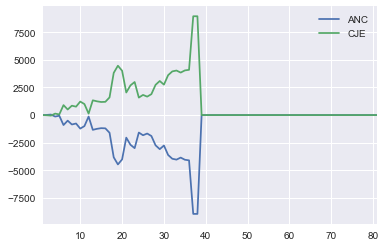

In [98]:
test = test.iloc[1:]
test.plot()

In [99]:
test.head()

,time,ANC,CJE
1,min_0,0,0
2,min_1,15,-15
3,min_2,46,-46
4,min_3,-133,133
5,min_4,-60,60


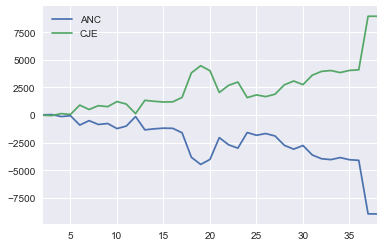

In [100]:
test = test[(test.ANC != 0) & (test.CJE != 0)]
test.plot()

## Kills
The following two sections transform the raw data into counts for each team and each player. A simple ratio is calculated for each.

At the end of this section game metadata is added to each dataframe.

In [326]:
kills_df = pd.read_csv('deathValues2.csv')

In [327]:
kills_df.head(10)

,match_Id,TeamColor,Time,Victim,Killer,Assist_1,Assist_2,Assist_3,Assist_4
0,fbb300951ad8327c,Blue,10.82,C9 Hai,TSM Bjergsen,NaN,NaN,NaN,NaN
1,fbb300951ad8327c,Blue,16.286,C9 LemonNation,TSM WildTurtle,TSM Santorin,TSM Bjergsen,TSM Lustboy,NaN
2,fbb300951ad8327c,Blue,18.733,C9 Hai,TSM Bjergsen,TSM Santorin,TSM WildTurtle,TSM Lustboy,NaN
3,fbb300951ad8327c,Blue,18.88,C9 Meteos,TSM Dyrus,TSM Santorin,TSM Bjergsen,TSM WildTurtle,TSM Lustboy
4,fbb300951ad8327c,Blue,27.005,C9 Balls,TSM Bjergsen,TSM Dyrus,TSM Santorin,TSM WildTurtle,TSM Lustboy
5,fbb300951ad8327c,Blue,27.029,C9 LemonNation,TSM Dyrus,TSM Bjergsen,TSM WildTurtle,TSM Lustboy,NaN
6,fbb300951ad8327c,Blue,27.109,C9 Hai,TSM WildTurtle,TSM Dyrus,TSM Santorin,TSM Bjergsen,TSM Lustboy
7,fbb300951ad8327c,Blue,28.989,C9 LemonNation,TSM Bjergsen,TSM Dyrus,TSM Santorin,TSM WildTurtle,TSM Lustboy
8,fbb300951ad8327c,Blue,29.073,C9 Balls,TSM Bjergsen,TSM Dyrus,TSM Santorin,TSM WildTurtle,TSM Lustboy
9,fbb300951ad8327c,Blue,30.104,C9 Balls,TSM WildTurtle,TSM Santorin,TSM Bjergsen,TSM Lustboy,NaN


In [328]:
teams = kills_df[['Victim', 'Killer']]
teams.head()

,Victim,Killer
0,C9 Hai,TSM Bjergsen
1,C9 LemonNation,TSM WildTurtle
2,C9 Hai,TSM Bjergsen
3,C9 Meteos,TSM Dyrus
4,C9 Balls,TSM Bjergsen


In [329]:
teams['victim_team'], teams['victim'] = teams['Victim'].str.split(" ", 1).str

C:\Users\Mike\Anaconda2\envs\py3DataScience\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [330]:
teams.head()

,Victim,Killer,victim_team,victim
0,C9 Hai,TSM Bjergsen,C9,Hai
1,C9 LemonNation,TSM WildTurtle,C9,LemonNation
2,C9 Hai,TSM Bjergsen,C9,Hai
3,C9 Meteos,TSM Dyrus,C9,Meteos
4,C9 Balls,TSM Bjergsen,C9,Balls


In [331]:
teams['killing_team'], teams['killer'] = teams['Killer'].str.split(" ", 1).str

C:\Users\Mike\Anaconda2\envs\py3DataScience\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [332]:
teams.head()

,Victim,Killer,victim_team,victim,killing_team,killer
0,C9 Hai,TSM Bjergsen,C9,Hai,TSM,Bjergsen
1,C9 LemonNation,TSM WildTurtle,C9,LemonNation,TSM,WildTurtle
2,C9 Hai,TSM Bjergsen,C9,Hai,TSM,Bjergsen
3,C9 Meteos,TSM Dyrus,C9,Meteos,TSM,Dyrus
4,C9 Balls,TSM Bjergsen,C9,Balls,TSM,Bjergsen


In [333]:
teams = teams[['victim_team', 'victim', 'killing_team', 'killer']]
teams.head()

,victim_team,victim,killing_team,killer
0,C9,Hai,TSM,Bjergsen
1,C9,LemonNation,TSM,WildTurtle
2,C9,Hai,TSM,Bjergsen
3,C9,Meteos,TSM,Dyrus
4,C9,Balls,TSM,Bjergsen


In [334]:
teams.loc[teams['victim_team'] == 'Kt', :]

,victim_team,victim,killing_team,killer
47593,Kt,Mata,MVP,MaHa
93360,Kt,Mata,MVP,Max
93361,Kt,Mata,MVP,Max
93364,Kt,Mata,MVP,Beyond
93379,Kt,Mata,MVP,Ian
93383,Kt,Mata,SSG,Ruler
93384,Kt,Mata,SSG,Crown


In [335]:
teams.loc[teams['killing_team'] == 'Kt', :]

,victim_team,victim,killing_team,killer
47615,MVP,Max,Kt,Mata
47633,SSG,Crown,Kt,Mata
47647,SSG,Haru,Kt,Mata
93344,MVP,Beyond,Kt,Mata


In [336]:
teams['victim_team'] = teams['victim_team'].replace(['Kt'],'kt')
teams['killing_team'] = teams['killing_team'].replace(['Kt'],'kt')

In [337]:
teams.loc[teams['killing_team'] == 'Kt', :]

,victim_team,victim,killing_team,killer


In [338]:
print(len(kills_df))
print(len(teams))

94341
94341


In [339]:
merged_kills = pd.merge(kills_df, teams, left_index=True, right_index=True)
merged_kills.head()

,match_Id,TeamColor,Time,Victim,Killer,Assist_1,Assist_2,Assist_3,Assist_4,victim_team,victim,killing_team,killer
0,fbb300951ad8327c,Blue,10.82,C9 Hai,TSM Bjergsen,NaN,NaN,NaN,NaN,C9,Hai,TSM,Bjergsen
1,fbb300951ad8327c,Blue,16.286,C9 LemonNation,TSM WildTurtle,TSM Santorin,TSM Bjergsen,TSM Lustboy,NaN,C9,LemonNation,TSM,WildTurtle
2,fbb300951ad8327c,Blue,18.733,C9 Hai,TSM Bjergsen,TSM Santorin,TSM WildTurtle,TSM Lustboy,NaN,C9,Hai,TSM,Bjergsen
3,fbb300951ad8327c,Blue,18.88,C9 Meteos,TSM Dyrus,TSM Santorin,TSM Bjergsen,TSM WildTurtle,TSM Lustboy,C9,Meteos,TSM,Dyrus
4,fbb300951ad8327c,Blue,27.005,C9 Balls,TSM Bjergsen,TSM Dyrus,TSM Santorin,TSM WildTurtle,TSM Lustboy,C9,Balls,TSM,Bjergsen


In [340]:
len(merged_kills)

94341

In [341]:
merged_kills.drop(['Victim', 'Killer'], inplace=True, axis=1)
merged_kills.head()

,match_Id,TeamColor,Time,Assist_1,Assist_2,Assist_3,Assist_4,victim_team,victim,killing_team,killer
0,fbb300951ad8327c,Blue,10.82,NaN,NaN,NaN,NaN,C9,Hai,TSM,Bjergsen
1,fbb300951ad8327c,Blue,16.286,TSM Santorin,TSM Bjergsen,TSM Lustboy,NaN,C9,LemonNation,TSM,WildTurtle
2,fbb300951ad8327c,Blue,18.733,TSM Santorin,TSM WildTurtle,TSM Lustboy,NaN,C9,Hai,TSM,Bjergsen
3,fbb300951ad8327c,Blue,18.88,TSM Santorin,TSM Bjergsen,TSM WildTurtle,TSM Lustboy,C9,Meteos,TSM,Dyrus
4,fbb300951ad8327c,Blue,27.005,TSM Dyrus,TSM Santorin,TSM WildTurtle,TSM Lustboy,C9,Balls,TSM,Bjergsen


In [342]:
teams2 = merged_kills[['Assist_1', 'Assist_2', 'Assist_3', 'Assist_4',]]

In [343]:
teams2['assist_team'], teams2['assist'] = teams2['Assist_1'].str.split(" ", 1).str
teams2.head()

C:\Users\Mike\Anaconda2\envs\py3DataScience\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Assist_1,Assist_2,Assist_3,Assist_4,assist_team,assist
0,NaN,NaN,NaN,NaN,NaN,NaN
1,TSM Santorin,TSM Bjergsen,TSM Lustboy,NaN,TSM,Santorin
2,TSM Santorin,TSM WildTurtle,TSM Lustboy,NaN,TSM,Santorin
3,TSM Santorin,TSM Bjergsen,TSM WildTurtle,TSM Lustboy,TSM,Santorin
4,TSM Dyrus,TSM Santorin,TSM WildTurtle,TSM Lustboy,TSM,Dyrus


In [344]:
teams2['assist_team2'], teams2['assist2'] = teams2['Assist_2'].str.split(" ", 1).str
teams2['assist_team3'], teams2['assist3'] = teams2['Assist_3'].str.split(" ", 1).str
teams2['assist_team4'], teams2['assist4'] = teams2['Assist_4'].str.split(" ", 1).str

C:\Users\Mike\Anaconda2\envs\py3DataScience\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Mike\Anaconda2\envs\py3DataScience\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [345]:
teams2.head()

,Assist_1,Assist_2,Assist_3,Assist_4,assist_team,assist,assist_team2,assist2,assist_team3,assist3,assist_team4,assist4
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TSM Santorin,TSM Bjergsen,TSM Lustboy,NaN,TSM,Santorin,TSM,Bjergsen,TSM,Lustboy,NaN,NaN
2,TSM Santorin,TSM WildTurtle,TSM Lustboy,NaN,TSM,Santorin,TSM,WildTurtle,TSM,Lustboy,NaN,NaN
3,TSM Santorin,TSM Bjergsen,TSM WildTurtle,TSM Lustboy,TSM,Santorin,TSM,Bjergsen,TSM,WildTurtle,TSM,Lustboy
4,TSM Dyrus,TSM Santorin,TSM WildTurtle,TSM Lustboy,TSM,Dyrus,TSM,Santorin,TSM,WildTurtle,TSM,Lustboy


In [346]:
teams2 = teams2[['assist', 'assist2', 'assist3', 'assist4',]]
teams2.head()

,assist,assist2,assist3,assist4
0,NaN,NaN,NaN,NaN
1,Santorin,Bjergsen,Lustboy,NaN
2,Santorin,WildTurtle,Lustboy,NaN
3,Santorin,Bjergsen,WildTurtle,Lustboy
4,Dyrus,Santorin,WildTurtle,Lustboy


In [347]:
print(len(merged_kills))
print(len(teams2))

94341
94341


In [348]:
merged_kills = pd.merge(merged_kills, teams2, left_index=True, right_index=True)
merged_kills.head()

,match_Id,TeamColor,Time,Assist_1,Assist_2,Assist_3,Assist_4,victim_team,victim,killing_team,killer,assist,assist2,assist3,assist4
0,fbb300951ad8327c,Blue,10.82,NaN,NaN,NaN,NaN,C9,Hai,TSM,Bjergsen,NaN,NaN,NaN,NaN
1,fbb300951ad8327c,Blue,16.286,TSM Santorin,TSM Bjergsen,TSM Lustboy,NaN,C9,LemonNation,TSM,WildTurtle,Santorin,Bjergsen,Lustboy,NaN
2,fbb300951ad8327c,Blue,18.733,TSM Santorin,TSM WildTurtle,TSM Lustboy,NaN,C9,Hai,TSM,Bjergsen,Santorin,WildTurtle,Lustboy,NaN
3,fbb300951ad8327c,Blue,18.88,TSM Santorin,TSM Bjergsen,TSM WildTurtle,TSM Lustboy,C9,Meteos,TSM,Dyrus,Santorin,Bjergsen,WildTurtle,Lustboy
4,fbb300951ad8327c,Blue,27.005,TSM Dyrus,TSM Santorin,TSM WildTurtle,TSM Lustboy,C9,Balls,TSM,Bjergsen,Dyrus,Santorin,WildTurtle,Lustboy


In [349]:
len(merged_kills)

94341

In [350]:
merged_kills.drop(['Assist_1', 'Assist_2', 'Assist_3', 'Assist_4'], inplace=True, axis=1)
merged_kills.head()

,match_Id,TeamColor,Time,victim_team,victim,killing_team,killer,assist,assist2,assist3,assist4
0,fbb300951ad8327c,Blue,10.82,C9,Hai,TSM,Bjergsen,NaN,NaN,NaN,NaN
1,fbb300951ad8327c,Blue,16.286,C9,LemonNation,TSM,WildTurtle,Santorin,Bjergsen,Lustboy,NaN
2,fbb300951ad8327c,Blue,18.733,C9,Hai,TSM,Bjergsen,Santorin,WildTurtle,Lustboy,NaN
3,fbb300951ad8327c,Blue,18.88,C9,Meteos,TSM,Dyrus,Santorin,Bjergsen,WildTurtle,Lustboy
4,fbb300951ad8327c,Blue,27.005,C9,Balls,TSM,Bjergsen,Dyrus,Santorin,WildTurtle,Lustboy


In [351]:
kills_pivot = pd.pivot_table(merged_kills, index=['match_Id', 
                                                  'TeamColor', 
                                                  'killing_team'
                                                 ], values='killer', aggfunc='count')
kills_pivot.head()

killer
match_Id         TeamColor killing_team        
001a1f289e3bab22 Blue      ANC               10
                 Red       CJE               23
001f50c8547e2e73 Blue      EDG               28
                 Red       AHQ               10
002f613ae09ad421 Blue      TPA               13

In [352]:
kills_pivot = kills_pivot.reset_index()
kills_pivot.head()

,match_Id,TeamColor,killing_team,killer
0,001a1f289e3bab22,Blue,ANC,10
1,001a1f289e3bab22,Red,CJE,23
2,001f50c8547e2e73,Blue,EDG,28
3,001f50c8547e2e73,Red,AHQ,10
4,002f613ae09ad421,Blue,TPA,13


In [353]:
assist_pivot = pd.pivot_table(merged_kills, index=['match_Id', 
                                                  'TeamColor', 
                                                  'killing_team'
                                                 ], values=['assist', 'assist2','assist3','assist4'], aggfunc='count')
assist_pivot.reset_index(inplace=True)

In [354]:
assist_pivot.head()

,match_Id,TeamColor,killing_team,assist,assist2,assist3,assist4
0,001a1f289e3bab22,Blue,ANC,9,7,6,2
1,001a1f289e3bab22,Red,CJE,22,18,11,5
2,001f50c8547e2e73,Blue,EDG,25,21,11,3
3,001f50c8547e2e73,Red,AHQ,10,7,5,1
4,002f613ae09ad421,Blue,TPA,12,10,5,3


In [355]:
assist_pivot['assist_sum'] = assist_pivot[assist_pivot.columns[3:]].sum(axis=1)
assist_pivot.drop(['assist', 'assist2', 'assist3', 'assist4'], inplace=True, axis=1)
assist_pivot.head()

,match_Id,TeamColor,killing_team,assist_sum
0,001a1f289e3bab22,Blue,ANC,24
1,001a1f289e3bab22,Red,CJE,56
2,001f50c8547e2e73,Blue,EDG,60
3,001f50c8547e2e73,Red,AHQ,23
4,002f613ae09ad421,Blue,TPA,30


In [356]:
print(len(kills_pivot))
print(len(assist_pivot))

7510
7510


In [357]:
kills_assist = kills_pivot.merge(assist_pivot, on = ['match_Id', 'TeamColor','killing_team'])
kills_assist.head()

,match_Id,TeamColor,killing_team,killer,assist_sum
0,001a1f289e3bab22,Blue,ANC,10,24
1,001a1f289e3bab22,Red,CJE,23,56
2,001f50c8547e2e73,Blue,EDG,28,60
3,001f50c8547e2e73,Red,AHQ,10,23
4,002f613ae09ad421,Blue,TPA,13,30


In [358]:
kills_assist.rename(columns={'num_kills':'kills_sum'}, inplace=True)
kills_assist.head()

,match_Id,TeamColor,killing_team,killer,assist_sum
0,001a1f289e3bab22,Blue,ANC,10,24
1,001a1f289e3bab22,Red,CJE,23,56
2,001f50c8547e2e73,Blue,EDG,28,60
3,001f50c8547e2e73,Red,AHQ,10,23
4,002f613ae09ad421,Blue,TPA,13,30


In [359]:
kills_assist.to_csv('team_kills_assists_sum.csv')

In [360]:
merged_kills['killer1'] = merged_kills['killer']

In [361]:
player_kills = pd.pivot_table(merged_kills, index=['match_Id', 
                                                  'killing_team',
                                                  'killer'
                                                 ], values='killer1', aggfunc='count')
player_kills.reset_index(inplace=True)
player_kills.head()

,match_Id,killing_team,killer,killer1
0,001a1f289e3bab22,ANC,Mickey,2
1,001a1f289e3bab22,ANC,Sangyoon,5
2,001a1f289e3bab22,ANC,SnowFlower,1
3,001a1f289e3bab22,ANC,ikssu,1
4,001a1f289e3bab22,ANC,lira,1


In [362]:
merged_kills.head()

,match_Id,TeamColor,Time,victim_team,victim,killing_team,killer,assist,assist2,assist3,assist4,killer1
0,fbb300951ad8327c,Blue,10.82,C9,Hai,TSM,Bjergsen,NaN,NaN,NaN,NaN,Bjergsen
1,fbb300951ad8327c,Blue,16.286,C9,LemonNation,TSM,WildTurtle,Santorin,Bjergsen,Lustboy,NaN,WildTurtle
2,fbb300951ad8327c,Blue,18.733,C9,Hai,TSM,Bjergsen,Santorin,WildTurtle,Lustboy,NaN,Bjergsen
3,fbb300951ad8327c,Blue,18.88,C9,Meteos,TSM,Dyrus,Santorin,Bjergsen,WildTurtle,Lustboy,Dyrus
4,fbb300951ad8327c,Blue,27.005,C9,Balls,TSM,Bjergsen,Dyrus,Santorin,WildTurtle,Lustboy,Bjergsen


In [363]:
merged_kills['assist1'] = merged_kills['assist']
merged_kills['assist22'] = merged_kills['assist2']
merged_kills['assist33'] = merged_kills['assist3']
merged_kills['assist44'] = merged_kills['assist4']

In [364]:
player_assist = pd.pivot_table(merged_kills, index=['match_Id', 
                                                  'killing_team',
                                                  'assist'
                                                 ], values='assist1', aggfunc='count')
player_assist.reset_index(inplace=True)
player_assist.head()

,match_Id,killing_team,assist,assist1
0,001a1f289e3bab22,ANC,SnowFlower,2
1,001a1f289e3bab22,ANC,ikssu,4
2,001a1f289e3bab22,ANC,lira,3
3,001a1f289e3bab22,CJE,Ambition,8
4,001a1f289e3bab22,CJE,Coco,1


In [365]:
player_assist2 = pd.pivot_table(merged_kills, index=['match_Id', 
                                                  'killing_team',
                                                  'assist2'
                                                 ], values='assist22', aggfunc='count')
player_assist2.reset_index(inplace=True)
player_assist2.head()

,match_Id,killing_team,assist2,assist22
0,001a1f289e3bab22,ANC,Mickey,2
1,001a1f289e3bab22,ANC,Sangyoon,1
2,001a1f289e3bab22,ANC,SnowFlower,1
3,001a1f289e3bab22,ANC,lira,3
4,001a1f289e3bab22,CJE,Ambition,4


In [366]:
player_assist2.rename(columns={'assist2':'assist'}, inplace=True)

In [367]:
player_assist3 = pd.pivot_table(merged_kills, index=['match_Id', 
                                                  'killing_team',
                                                  'assist3'
                                                 ], values='assist33', aggfunc='count')
player_assist3.reset_index(inplace=True)
player_assist3.head()

,match_Id,killing_team,assist3,assist33
0,001a1f289e3bab22,ANC,Mickey,2
1,001a1f289e3bab22,ANC,Sangyoon,2
2,001a1f289e3bab22,ANC,SnowFlower,2
3,001a1f289e3bab22,CJE,Coco,3
4,001a1f289e3bab22,CJE,MadLife,4


In [368]:
player_assist3.rename(columns={'assist3':'assist'}, inplace=True)

In [369]:
player_assist4 = pd.pivot_table(merged_kills, index=['match_Id', 
                                                  'killing_team',
                                                  'assist4'
                                                 ], values='assist44', aggfunc='count')
player_assist4.reset_index(inplace=True)
player_assist4.head()

,match_Id,killing_team,assist4,assist44
0,001a1f289e3bab22,ANC,Sangyoon,1
1,001a1f289e3bab22,ANC,SnowFlower,1
2,001a1f289e3bab22,CJE,MadLife,5
3,001f50c8547e2e73,AHQ,GreenTea,1
4,001f50c8547e2e73,EDG,Fzzf,2


In [370]:
player_assist4.rename(columns={'assist4':'assist'}, inplace=True)

In [371]:
player_assist_merge = player_assist.merge(player_assist2, 'outer',on = ['match_Id', 'killing_team', 'assist'])
player_assist_merge.head()

,match_Id,killing_team,assist,assist1,assist22
0,001a1f289e3bab22,ANC,SnowFlower,2.0,1.0
1,001a1f289e3bab22,ANC,ikssu,4.0,NaN
2,001a1f289e3bab22,ANC,lira,3.0,3.0
3,001a1f289e3bab22,CJE,Ambition,8.0,4.0
4,001a1f289e3bab22,CJE,Coco,1.0,6.0


In [372]:
player_assist_merge.shape

(33985, 5)

In [373]:
player_assist_merge = player_assist_merge.merge(player_assist3,'outer', on= ['match_Id', 'killing_team', 'assist'])
player_assist_merge.head()

,match_Id,killing_team,assist,assist1,assist22,assist33
0,001a1f289e3bab22,ANC,SnowFlower,2.0,1.0,2.0
1,001a1f289e3bab22,ANC,ikssu,4.0,NaN,NaN
2,001a1f289e3bab22,ANC,lira,3.0,3.0,NaN
3,001a1f289e3bab22,CJE,Ambition,8.0,4.0,NaN
4,001a1f289e3bab22,CJE,Coco,1.0,6.0,3.0


In [374]:
player_assist_merge = player_assist_merge.merge(player_assist4,'outer', on= ['match_Id', 'killing_team', 'assist'])
player_assist_merge.head()

,match_Id,killing_team,assist,assist1,assist22,assist33,assist44
0,001a1f289e3bab22,ANC,SnowFlower,2.0,1.0,2.0,1.0
1,001a1f289e3bab22,ANC,ikssu,4.0,NaN,NaN,NaN
2,001a1f289e3bab22,ANC,lira,3.0,3.0,NaN,NaN
3,001a1f289e3bab22,CJE,Ambition,8.0,4.0,NaN,NaN
4,001a1f289e3bab22,CJE,Coco,1.0,6.0,3.0,NaN


In [375]:
player_assist_merge['assist_sum'] = player_assist_merge[player_assist_merge.columns[3:]].sum(axis=1)
player_assist_merge.head()

,match_Id,killing_team,assist,assist1,assist22,assist33,assist44,assist_sum
0,001a1f289e3bab22,ANC,SnowFlower,2.0,1.0,2.0,1.0,6.0
1,001a1f289e3bab22,ANC,ikssu,4.0,NaN,NaN,NaN,4.0
2,001a1f289e3bab22,ANC,lira,3.0,3.0,NaN,NaN,6.0
3,001a1f289e3bab22,CJE,Ambition,8.0,4.0,NaN,NaN,12.0
4,001a1f289e3bab22,CJE,Coco,1.0,6.0,3.0,NaN,10.0


In [376]:
player_assist_merge.drop(['assist1', 'assist22', 'assist33', 'assist44'], inplace=True, axis=1)
player_assist_merge.head()

,match_Id,killing_team,assist,assist_sum
0,001a1f289e3bab22,ANC,SnowFlower,6.0
1,001a1f289e3bab22,ANC,ikssu,4.0
2,001a1f289e3bab22,ANC,lira,6.0
3,001a1f289e3bab22,CJE,Ambition,12.0
4,001a1f289e3bab22,CJE,Coco,10.0


In [377]:
player_kills.rename(columns={'killer1':'kills_sum','killer':'player'},inplace=True)
player_kills.head()

,match_Id,killing_team,player,kills_sum
0,001a1f289e3bab22,ANC,Mickey,2
1,001a1f289e3bab22,ANC,Sangyoon,5
2,001a1f289e3bab22,ANC,SnowFlower,1
3,001a1f289e3bab22,ANC,ikssu,1
4,001a1f289e3bab22,ANC,lira,1


In [378]:
player_kills.to_csv('player_kills_sums.csv')

In [379]:
player_assist_merge.rename(columns={'assist':'player'},inplace=True)
player_assist_merge.head()

,match_Id,killing_team,player,assist_sum
0,001a1f289e3bab22,ANC,SnowFlower,6.0
1,001a1f289e3bab22,ANC,ikssu,4.0
2,001a1f289e3bab22,ANC,lira,6.0
3,001a1f289e3bab22,CJE,Ambition,12.0
4,001a1f289e3bab22,CJE,Coco,10.0


In [380]:
player_assist_merge.shape

(35791, 4)

In [381]:
player_kills.shape

(28963, 4)

In [382]:
player_assist_merge.to_csv('player_assists_sums.csv')

## Deaths

In [383]:
merged_kills.head()

,match_Id,TeamColor,Time,victim_team,victim,killing_team,killer,assist,assist2,assist3,assist4,killer1,assist1,assist22,assist33,assist44
0,fbb300951ad8327c,Blue,10.82,C9,Hai,TSM,Bjergsen,NaN,NaN,NaN,NaN,Bjergsen,NaN,NaN,NaN,NaN
1,fbb300951ad8327c,Blue,16.286,C9,LemonNation,TSM,WildTurtle,Santorin,Bjergsen,Lustboy,NaN,WildTurtle,Santorin,Bjergsen,Lustboy,NaN
2,fbb300951ad8327c,Blue,18.733,C9,Hai,TSM,Bjergsen,Santorin,WildTurtle,Lustboy,NaN,Bjergsen,Santorin,WildTurtle,Lustboy,NaN
3,fbb300951ad8327c,Blue,18.88,C9,Meteos,TSM,Dyrus,Santorin,Bjergsen,WildTurtle,Lustboy,Dyrus,Santorin,Bjergsen,WildTurtle,Lustboy
4,fbb300951ad8327c,Blue,27.005,C9,Balls,TSM,Bjergsen,Dyrus,Santorin,WildTurtle,Lustboy,Bjergsen,Dyrus,Santorin,WildTurtle,Lustboy


In [384]:
merged_kills['victim1'] = merged_kills['victim']

In [385]:
team_deaths = pd.pivot_table(merged_kills, index=['match_Id', 
                                                  'victim_team'                                                
                                                 ], values='victim', aggfunc='count')
team_deaths.reset_index(inplace=True)
team_deaths.head()

,match_Id,victim_team,victim
0,001a1f289e3bab22,ANC,23
1,001a1f289e3bab22,CJE,10
2,001f50c8547e2e73,AHQ,28
3,001f50c8547e2e73,EDG,10
4,002f613ae09ad421,XG,13


In [386]:
player_deaths = pd.pivot_table(merged_kills, index=['match_Id', 
                                                  'victim_team',
                                                    'victim'
                                                 ], values='victim1', aggfunc='count')
player_deaths.reset_index(inplace=True)
player_deaths.head()

,match_Id,victim_team,victim,victim1
0,001a1f289e3bab22,ANC,Mickey,6
1,001a1f289e3bab22,ANC,Sangyoon,3
2,001a1f289e3bab22,ANC,SnowFlower,4
3,001a1f289e3bab22,ANC,ikssu,3
4,001a1f289e3bab22,ANC,lira,7


In [387]:
player_deaths.rename(columns={'victim1':'deaths'},inplace=True)

In [388]:
player_deaths.rename(columns={'victim':'player', 'victim_team':'killing_team'},inplace=True)


In [389]:
player_deaths.head()

,match_Id,killing_team,player,deaths
0,001a1f289e3bab22,ANC,Mickey,6
1,001a1f289e3bab22,ANC,Sangyoon,3
2,001a1f289e3bab22,ANC,SnowFlower,4
3,001a1f289e3bab22,ANC,ikssu,3
4,001a1f289e3bab22,ANC,lira,7


In [390]:
player_kills.head()

,match_Id,killing_team,player,kills_sum
0,001a1f289e3bab22,ANC,Mickey,2
1,001a1f289e3bab22,ANC,Sangyoon,5
2,001a1f289e3bab22,ANC,SnowFlower,1
3,001a1f289e3bab22,ANC,ikssu,1
4,001a1f289e3bab22,ANC,lira,1


In [391]:
player_assist_merge.head()

,match_Id,killing_team,player,assist_sum
0,001a1f289e3bab22,ANC,SnowFlower,6.0
1,001a1f289e3bab22,ANC,ikssu,4.0
2,001a1f289e3bab22,ANC,lira,6.0
3,001a1f289e3bab22,CJE,Ambition,12.0
4,001a1f289e3bab22,CJE,Coco,10.0


In [392]:
merged_kda = player_assist_merge.merge(player_kills, 'outer', on= ['match_Id', 'killing_team', 'player'])
merged_kda.head()

,match_Id,killing_team,player,assist_sum,kills_sum
0,001a1f289e3bab22,ANC,SnowFlower,6.0,1.0
1,001a1f289e3bab22,ANC,ikssu,4.0,1.0
2,001a1f289e3bab22,ANC,lira,6.0,1.0
3,001a1f289e3bab22,CJE,Ambition,12.0,4.0
4,001a1f289e3bab22,CJE,Coco,10.0,8.0


In [393]:
merged_kda = merged_kda.merge(player_deaths,'outer', on=['match_Id', 'killing_team', 'player'])
merged_kda.head()

,match_Id,killing_team,player,assist_sum,kills_sum,deaths
0,001a1f289e3bab22,ANC,SnowFlower,6.0,1.0,4.0
1,001a1f289e3bab22,ANC,ikssu,4.0,1.0,3.0
2,001a1f289e3bab22,ANC,lira,6.0,1.0,7.0
3,001a1f289e3bab22,CJE,Ambition,12.0,4.0,2.0
4,001a1f289e3bab22,CJE,Coco,10.0,8.0,2.0


In [394]:
merged_kda.rename(columns={'killing_team':'team_name', 'assist_sum':'assists','kills_sum':'kills'},inplace=True)

In [395]:
merged_kda.rename(columns={'match_Id':'match_id'},inplace=True)

In [396]:
cols = list(merged_kda.columns.values)
cols = ['match_id', 'team_name', 'player', 'kills', 'deaths', 'assists']

In [397]:
merged_kda = merged_kda[cols]
merged_kda.head()

,match_id,team_name,player,kills,deaths,assists
0,001a1f289e3bab22,ANC,SnowFlower,1.0,4.0,6.0
1,001a1f289e3bab22,ANC,ikssu,1.0,3.0,4.0
2,001a1f289e3bab22,ANC,lira,1.0,7.0,6.0
3,001a1f289e3bab22,CJE,Ambition,4.0,2.0,12.0
4,001a1f289e3bab22,CJE,Coco,8.0,2.0,10.0


In [399]:
merged_kda['deaths'] = merged_kda['deaths'].replace([np.nan],0)
merged_kda['kills'] = merged_kda['kills'].replace([np.nan],0)
merged_kda['assists'] = merged_kda['assists'].replace([np.nan],0)
merged_kda.head()

,match_id,team_name,player,kills,deaths,assists
0,001a1f289e3bab22,ANC,SnowFlower,1.0,4.0,6.0
1,001a1f289e3bab22,ANC,ikssu,1.0,3.0,4.0
2,001a1f289e3bab22,ANC,lira,1.0,7.0,6.0
3,001a1f289e3bab22,CJE,Ambition,4.0,2.0,12.0
4,001a1f289e3bab22,CJE,Coco,8.0,2.0,10.0
5,001a1f289e3bab22,CJE,MadLife,2.0,2.0,16.0
6,001a1f289e3bab22,CJE,Shy,2.0,2.0,10.0
7,001a1f289e3bab22,CJE,Space,7.0,2.0,8.0
8,001f50c8547e2e73,AHQ,GarnetDevil,3.0,5.0,4.0
9,001f50c8547e2e73,AHQ,NAZ,1.0,5.0,3.0


In [400]:
def kda_ratio(a, b, c):
    kills = a
    assists = c
    deaths = b
    
    if deaths == 0:
        deaths = 1
              
    kda_ratio = (kills+assists) / deaths
    return kda_ratio

In [401]:
merged_kda['kda_ratio'] = merged_kda.apply(lambda row: kda_ratio(row['kills'], row['deaths'], row['assists']), axis=1)

In [402]:
merged_kda.head(25)

,match_id,team_name,player,kills,deaths,assists,kda_ratio
0,001a1f289e3bab22,ANC,SnowFlower,1.0,4.0,6.0,1.750000
1,001a1f289e3bab22,ANC,ikssu,1.0,3.0,4.0,1.666667
2,001a1f289e3bab22,ANC,lira,1.0,7.0,6.0,1.000000
3,001a1f289e3bab22,CJE,Ambition,4.0,2.0,12.0,8.000000
4,001a1f289e3bab22,CJE,Coco,8.0,2.0,10.0,9.000000
5,001a1f289e3bab22,CJE,MadLife,2.0,2.0,16.0,9.000000
6,001a1f289e3bab22,CJE,Shy,2.0,2.0,10.0,6.000000
7,001a1f289e3bab22,CJE,Space,7.0,2.0,8.0,7.500000
8,001f50c8547e2e73,AHQ,GarnetDevil,3.0,5.0,4.0,1.400000
9,001f50c8547e2e73,AHQ,NAZ,1.0,5.0,3.0,0.800000


In [403]:
merged_kda.shape

(37766, 7)

In [404]:
team_deaths.head()

,match_Id,victim_team,victim
0,001a1f289e3bab22,ANC,23
1,001a1f289e3bab22,CJE,10
2,001f50c8547e2e73,AHQ,28
3,001f50c8547e2e73,EDG,10
4,002f613ae09ad421,XG,13


In [405]:
kills_assist.head()

,match_Id,TeamColor,killing_team,killer,assist_sum
0,001a1f289e3bab22,Blue,ANC,10,24
1,001a1f289e3bab22,Red,CJE,23,56
2,001f50c8547e2e73,Blue,EDG,28,60
3,001f50c8547e2e73,Red,AHQ,10,23
4,002f613ae09ad421,Blue,TPA,13,30


In [406]:
team_deaths.rename(columns={'victim_team':'killing_team'},inplace=True)

In [407]:
print(len(kills_assist))
print(len(team_deaths))

7510
7510


In [408]:
team_kda = kills_assist.merge(team_deaths,'outer', on=['match_Id', 'killing_team'])
team_kda.head()

,match_Id,TeamColor,killing_team,killer,assist_sum,victim
0,001a1f289e3bab22,Blue,ANC,10.0,24.0,23.0
1,001a1f289e3bab22,Red,CJE,23.0,56.0,10.0
2,001f50c8547e2e73,Blue,EDG,28.0,60.0,10.0
3,001f50c8547e2e73,Red,AHQ,10.0,23.0,28.0
4,002f613ae09ad421,Blue,TPA,13.0,30.0,NaN


In [409]:
team_kda.rename(columns={'match_Id':'match_id', 'TeamColor':'red_or_blue_side', 'killing_team':'team_name', 
                        'killer':'kills','assist_sum':'assists', 'victim':'deaths'},inplace=True)

In [410]:
cols = list(team_kda.columns.values)
cols = ['match_id', 'red_or_blue_side', 'team_name', 'kills', 'deaths', 'assists']

In [411]:
team_kda = team_kda[cols]
team_kda.head()

,match_id,red_or_blue_side,team_name,kills,deaths,assists
0,001a1f289e3bab22,Blue,ANC,10.0,23.0,24.0
1,001a1f289e3bab22,Red,CJE,23.0,10.0,56.0
2,001f50c8547e2e73,Blue,EDG,28.0,10.0,60.0
3,001f50c8547e2e73,Red,AHQ,10.0,28.0,23.0
4,002f613ae09ad421,Blue,TPA,13.0,NaN,30.0


In [412]:
team_kda['deaths'] = team_kda['deaths'].replace([np.nan],0)
team_kda['kills'] = team_kda['kills'].replace([np.nan],0)
team_kda['assists'] = team_kda['assists'].replace([np.nan],0)
team_kda.head()

,match_id,red_or_blue_side,team_name,kills,deaths,assists
0,001a1f289e3bab22,Blue,ANC,10.0,23.0,24.0
1,001a1f289e3bab22,Red,CJE,23.0,10.0,56.0
2,001f50c8547e2e73,Blue,EDG,28.0,10.0,60.0
3,001f50c8547e2e73,Red,AHQ,10.0,28.0,23.0
4,002f613ae09ad421,Blue,TPA,13.0,0.0,30.0


In [413]:
team_kda['kda_ratio'] = team_kda.apply(lambda row: kda_ratio(row['kills'], row['deaths'], row['assists']), axis=1)

In [414]:
team_kda.head()

,match_id,red_or_blue_side,team_name,kills,deaths,assists,kda_ratio
0,001a1f289e3bab22,Blue,ANC,10.0,23.0,24.0,1.478261
1,001a1f289e3bab22,Red,CJE,23.0,10.0,56.0,7.900000
2,001f50c8547e2e73,Blue,EDG,28.0,10.0,60.0,8.800000
3,001f50c8547e2e73,Red,AHQ,10.0,28.0,23.0,1.178571
4,002f613ae09ad421,Blue,TPA,13.0,0.0,30.0,43.000000


In [416]:
team_kda.shape

(7560, 7)

In [417]:
team_kda.head()


,match_id,red_or_blue_side,team_name,kills,deaths,assists,kda_ratio
0,001a1f289e3bab22,Blue,ANC,10.0,23.0,24.0,1.478261
1,001a1f289e3bab22,Red,CJE,23.0,10.0,56.0,7.900000
2,001f50c8547e2e73,Blue,EDG,28.0,10.0,60.0,8.800000
3,001f50c8547e2e73,Red,AHQ,10.0,28.0,23.0,1.178571
4,002f613ae09ad421,Blue,TPA,13.0,0.0,30.0,43.000000


In [418]:
merged_kda.to_csv('player_kda.csv')

In [419]:
team_kda.to_csv('team_kda.csv')

In [420]:
team_kda.shape

(7560, 7)

In [421]:
merged_kda.shape

(37766, 7)

## Objectives
This section turns the raw data into counts for each team and objective in each game.

In [195]:
df = pd.read_csv('objValues1.csv', index_col=0)
df.head()

,Match_ID,ObjType,num_1,num_2,num_3,num_4,num_5,num_6,num_7,num_8,num_9,num_10,num_11,num_12,num_13,num_14,num_15,num_16
0,fbb300951ad8327c,bTowers,23.038,15.217,15.014,33.583,39.269,39.376,16.556,17.856,27.542,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,055b17da8456fdc8,bTowers,33.018,34.766,23.239,20.058,15.306,25.564,28.989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8e8a9b58df366e2d,bTowers,18.294,36.946,32.833,25.481,29.505,38.445,39.420,25.120,30.158,39.566,37.109,17.34,35.463,15.045,33.135,NaN
3,0ed1cd0e0e57329c,bTowers,22.879,18.541,19.941,38.770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,f932becf86175f38,bTowers,33.925,26.963,22.594,34.515,34.213,14.976,33.717,18.487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [196]:
df.ObjType.value_counts()

rInhibs     3803
rTowers     3803
rHeralds    3803
bDragons    3803
bInhibs     3803
bBarons     3803
bTowers     3803
rDragons    3803
bHeralds    3803
rBarons     3803
Name: ObjType, dtype: int64

In [197]:
red_blue_dict = {'rHeralds':'red', 'rDragons':'red', 'rInhibs':'red', 'rTowers':'red', 'rBarons':'red',
                'bHeralds':'blue', 'bDragons':'blue', 'bInhibs':'blue', 'bTowers':'blue', 'bBarons':'blue'}

In [198]:
df['red_or_blue_side'] = df.ObjType.map(red_blue_dict)
df.head()

,Match_ID,ObjType,num_1,num_2,num_3,num_4,num_5,num_6,num_7,num_8,num_9,num_10,num_11,num_12,num_13,num_14,num_15,num_16,red_or_blue_side
0,fbb300951ad8327c,bTowers,23.038,15.217,15.014,33.583,39.269,39.376,16.556,17.856,27.542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,blue
1,055b17da8456fdc8,bTowers,33.018,34.766,23.239,20.058,15.306,25.564,28.989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,blue
2,8e8a9b58df366e2d,bTowers,18.294,36.946,32.833,25.481,29.505,38.445,39.420,25.120,30.158,39.566,37.109,17.34,35.463,15.045,33.135,NaN,blue
3,0ed1cd0e0e57329c,bTowers,22.879,18.541,19.941,38.770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,blue
4,f932becf86175f38,bTowers,33.925,26.963,22.594,34.515,34.213,14.976,33.717,18.487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,blue


In [199]:
name_dict = {'rHeralds':'heralds', 'rDragons':'dragons', 'rInhibs':'inhibs', 'rTowers':'towers', 'rBarons':'barons',
                'bHeralds':'heralds', 'bDragons':'dragons', 'bInhibs':'inhibs', 'bTowers':'towers', 'bBarons':'barons'}

In [200]:
df['object_type'] = df.ObjType.map(name_dict)
df.drop('ObjType', inplace=True, axis=1)
df.head()

,Match_ID,num_1,num_2,num_3,num_4,num_5,num_6,num_7,num_8,num_9,num_10,num_11,num_12,num_13,num_14,num_15,num_16,red_or_blue_side,object_type
0,fbb300951ad8327c,23.038,15.217,15.014,33.583,39.269,39.376,16.556,17.856,27.542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,blue,towers
1,055b17da8456fdc8,33.018,34.766,23.239,20.058,15.306,25.564,28.989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,blue,towers
2,8e8a9b58df366e2d,18.294,36.946,32.833,25.481,29.505,38.445,39.420,25.120,30.158,39.566,37.109,17.34,35.463,15.045,33.135,NaN,blue,towers
3,0ed1cd0e0e57329c,22.879,18.541,19.941,38.770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,blue,towers
4,f932becf86175f38,33.925,26.963,22.594,34.515,34.213,14.976,33.717,18.487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,blue,towers


In [201]:
cols = ['Match_ID', 'object_type', 'red_or_blue_side', 'num_1', 'num_2',  'num_3', 'num_4', 'num_5', 'num_6', 'num_7', 'num_8', 'num_9', 'num_10',
         'num_11', 'num_12', 'num_13', 'num_14', 'num_15', 'num_16']
df = df[cols]
df.head()

,Match_ID,object_type,red_or_blue_side,num_1,num_2,num_3,num_4,num_5,num_6,num_7,num_8,num_9,num_10,num_11,num_12,num_13,num_14,num_15,num_16
0,fbb300951ad8327c,towers,blue,23.038,15.217,15.014,33.583,39.269,39.376,16.556,17.856,27.542,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,055b17da8456fdc8,towers,blue,33.018,34.766,23.239,20.058,15.306,25.564,28.989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8e8a9b58df366e2d,towers,blue,18.294,36.946,32.833,25.481,29.505,38.445,39.420,25.120,30.158,39.566,37.109,17.34,35.463,15.045,33.135,NaN
3,0ed1cd0e0e57329c,towers,blue,22.879,18.541,19.941,38.770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,f932becf86175f38,towers,blue,33.925,26.963,22.594,34.515,34.213,14.976,33.717,18.487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [202]:
obj_pivot = pd.pivot_table(df, index=['Match_ID','object_type', 'red_or_blue_side'], values=df[3:], aggfunc='count')
obj_pivot.head()

num_1  num_10  num_11  num_12  \
Match_ID         object_type red_or_blue_side                                  
001a1f289e3bab22 barons      blue                  0       0       0       0   
                             red                   0       0       0       0   
                 dragons     blue                  1       0       0       0   
                             red                   1       0       0       0   
                 heralds     blue                  0       0       0       0   

                                               num_13  num_14  num_15  num_16  \
Match_ID         object_type red_or_blue_side                                   
001a1f289e3bab22 barons      blue                   0       0       0       0   
                             red                    0       0       0       0   
                 dragons     blue                   0       0       0       0   
                             red                    0       0       0       0   
                 heralds     blue                   0       0       0       0   

                                               num_2  num_3  num_4  num_5  \
Match_ID         object_type red_or_blue_side                               
001a1f289e3bab22 barons      blue                  0      0      0      0   
                             red                   0      0      0      0   
                 dragons     blue                  0      0      0      0   
                             red                   1      1      1      0   
                 heralds     blue                  0      0      0      0   

                                               num_6  num_7  num_8  num_9  
Match_ID         object_type red_or_blue_side                              
001a1f289e3bab22 barons      blue                  0      0      0      0  
                             red                   0      0      0      0  
                 dragons     blue                  0      0      0      0  
                             red                   0      0      0      0  
                 heralds     blue                  0      0      0      0

In [203]:
obj_pivot = obj_pivot.reset_index()
obj_pivot.head()

,Match_ID,object_type,red_or_blue_side,num_1,num_10,num_11,num_12,num_13,num_14,num_15,num_16,num_2,num_3,num_4,num_5,num_6,num_7,num_8,num_9
0,001a1f289e3bab22,barons,blue,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,001a1f289e3bab22,barons,red,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,001a1f289e3bab22,dragons,blue,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,001a1f289e3bab22,dragons,red,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0
4,001a1f289e3bab22,heralds,blue,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [204]:
obj_pivot['sum'] = obj_pivot[obj_pivot.columns[3:]].sum(axis=1)

In [205]:
cols = ['Match_ID', 'object_type', 'red_or_blue_side', 'sum']
obj_pivot = obj_pivot[cols]
obj_pivot.head()

,Match_ID,object_type,red_or_blue_side,sum
0,001a1f289e3bab22,barons,blue,0
1,001a1f289e3bab22,barons,red,0
2,001a1f289e3bab22,dragons,blue,1
3,001a1f289e3bab22,dragons,red,4
4,001a1f289e3bab22,heralds,blue,0


In [206]:
obj_pivot.to_csv('object_sums.csv')

In [207]:
cols = ['match_id', 'team_name', 'red_or_blue_side']
teams = df_merged[cols]
print(len(teams))
teams.head()

7604


,match_id,team_name,red_or_blue_side
0,001a1f289e3bab22,ANC,blue
1,001a1f289e3bab22,CJE,red
2,001f50c8547e2e73,EDG,blue
3,001f50c8547e2e73,AHQ,red
4,002f613ae09ad421,TPA,blue


In [208]:
obj_pivot.rename(columns={'Match_ID':'match_id'}, inplace=True)

In [209]:
obj_pivot.shape

(37800, 4)

In [210]:
teams.shape

(7604, 3)

In [211]:
obj_pivot2 = obj_pivot.merge(teams, on = ['match_id', 'red_or_blue_side'])
obj_pivot2.head()

,match_id,object_type,red_or_blue_side,sum,team_name
0,001a1f289e3bab22,barons,blue,0,ANC
1,001a1f289e3bab22,dragons,blue,1,ANC
2,001a1f289e3bab22,heralds,blue,0,ANC
3,001a1f289e3bab22,inhibs,blue,0,ANC
4,001a1f289e3bab22,towers,blue,3,ANC


In [212]:
obj_pivot2.shape

(38020, 5)

In [213]:
cols = ['match_id', 'object_type', 'red_or_blue_side', 'team_name','sum']
obj_pivot2 = obj_pivot2[cols]

In [214]:
obj_pivot2.to_csv('object_sums.csv')